### ***Avance 1***

### ***2. Importa las librerías que necesitarás***

In [291]:
# Importar librerías necesarias 

import pandas as pd  # Para manipulación de datos
import numpy as np   # Para operaciones numéricas

### ***3. Lee el archivo data_latinoamerica.csv***

In [292]:
# Ruta al archivo CSV

data_latinoamerica = '/Users/facundoa.sardo/Desktop/PYTHON/proyecto_integrador/data_latinoamerica.csv'

# Leer el archivo CSV

df_datalatinoamerica = pd.read_csv(data_latinoamerica,parse_dates=['date'])

# Mostrar las primeras filas del dataframe para verificar su contenido

print(df_datalatinoamerica.head())

  location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                      

### ***4. Compruebe la cantidad de registros y columnas especificadas***

In [293]:
# Comprobar la cantidad de registros y columnas

num_registros, num_columnas = df_datalatinoamerica.shape  # df.shape devuelve (filas, columnas)

print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de columnas: {num_columnas}")

Cantidad de registros: 12216057
Cantidad de columnas: 50


### ***5. Selecciona los países donde se expandirán***

In [294]:
# Lista de países a seleccionar

paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

# Filtrar el dataframe para incluir solo los países seleccionados

df_paises_seleccionados = df_datalatinoamerica[df_datalatinoamerica['country_name'].isin(paises_seleccionados)]

# Mostrar el dataframe filtrado

print(df_paises_seleccionados)

         location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0     

### ***6. Filtra los datos en fechas mayores a 2021-01-01***

In [295]:
# Filtrar el dataframe para incluir solo los países seleccionados

df_paises_seleccionados = df_datalatinoamerica[df_datalatinoamerica['country_name'].isin(paises_seleccionados)]

# Filtrar el dataframe para incluir solo las fechas mayores a 2021-01-01

df_paises_seleccionados_fecha = df_paises_seleccionados[df_paises_seleccionados['date'] >= '2021-01-01']

# Mostrar el dataframe filtrado

print(df_paises_seleccionados_fecha)

         location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366   

### ***7/8. Compara a nivel de país para llenar valores faltantes. Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes***

In [296]:
# Verificar cuántos valores nulos hay en cada columna

nulos_por_columna = df_paises_seleccionados_fecha.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos

nulos_por_columna[nulos_por_columna > 0]

new_confirmed                            3164800
new_deceased                             3167470
cumulative_confirmed                     3164800
cumulative_deceased                      3167470
cumulative_vaccine_doses_administered    7286122
population                                328750
population_male                           708125
population_female                         708125
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
human_development_index                  4081875
population_age_00_09                      924375
population_age_10_19                      924375
population_age_20_29                      924375
population_age_30_39                      924375
population_age_40_49                      924375
population_age_50_59                      924375
population_age_60_69                      924375
population_age_70_79                      924375
population_age_80_an

In [297]:
# Para cada columna numérica calcular el promedio de los valores agrupados por 'country_name' y llenar los valores nulos en esa columna con el promedio correspondiente.

for column in df_paises_seleccionados_fecha.select_dtypes(include=['float64', 'int64']).columns:
    
    df_paises_seleccionados_fecha.loc[df_paises_seleccionados_fecha[column].isnull(), column] = df_paises_seleccionados_fecha.groupby('country_name')[column].transform('mean')

In [298]:
# Verificar cuántos valores nulos hay en cada columna

nulos_por_columna = df_paises_seleccionados_fecha.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos

nulos_por_columna[nulos_por_columna > 0]

new_recovered           3090000
cumulative_recovered    3316875
dtype: int64

In [299]:
# Filtrar el DataFrame para incluir solo los países especificados en la lista de 'location_key'

df_paises_seleccionados_fecha_filtrada = df_paises_seleccionados_fecha[df_paises_seleccionados_fecha['location_key'].isin(['AR', 'BR', 'CL', 'CO', 'MX', 'PE'])]

# Mostrar la forma (número de filas y columnas) del DataFrame filtrado

df_paises_seleccionados_fecha_filtrada.shape

(3750, 50)

In [300]:
# Mostrar los tipos de datos de cada columna en el DataFrame

tipos_de_datos = df_paises_seleccionados_fecha.dtypes

# Imprimir los tipos de datos

print(tipos_de_datos)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
population                                      float64
population_male                                 float64
population_female                               float64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                            float64
population_age_10_19                            

### ***9. Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis***

In [301]:
# Obtener información general del DataFrame

print(df_paises_seleccionados_fecha_filtrada.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 366 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float64       
 5   new_deceased                           3750 non-null   float64       
 6   cumulative_confirmed                   3750 non-null   float64       
 7   cumulative_deceased                    3750 non-null   float64       
 8   cumulative_vaccine_doses_administered  3750 non-null   float64       
 9   population                             3750 non-null   float64

In [302]:
# Obtener estadísticas descriptivas del DataFrame

variables_covid = ['new_confirmed', 'new_deceased', 'new_recovered', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'population', 'population_density']

print(df_paises_seleccionados_fecha_filtrada[variables_covid].describe())

       new_confirmed  new_deceased  new_recovered  cumulative_confirmed  \
count    3750.000000   3750.000000    1875.000000          3.750000e+03   
mean    13847.068049    275.756145   16534.661694          6.739481e+06   
std     24212.032370    507.199592   30411.844440          7.989204e+06   
min      -573.000000      0.000000  -31119.000000          9.710000e+02   
25%      1511.000000     25.000000       0.000000          2.114256e+06   
50%      5102.000000     98.000000    1835.000000          3.616940e+06   
75%     14802.500000    311.750000   21545.500000          6.198848e+06   
max    298408.000000  11447.000000  282957.000000          3.456883e+07   

       cumulative_deceased  cumulative_recovered    population  \
count          3750.000000          1.250000e+03  3.750000e+03   
mean         191898.256947          1.167464e+07  7.772147e+07   
std          182986.896396          1.102157e+07  6.713774e+07   
min               1.000000          1.564503e+04  1.757400e+

In [303]:
# Calcular estadísticas fundamentales

media = df_paises_seleccionados_fecha_filtrada[variables_covid].mean()
mediana = df_paises_seleccionados_fecha_filtrada[variables_covid].median()
desviacion_estandar = df_paises_seleccionados_fecha_filtrada[variables_covid].std()
rango = df_paises_seleccionados_fecha_filtrada[variables_covid].max() - df_paises_seleccionados_fecha_filtrada[variables_covid].min()
minimo = df_paises_seleccionados_fecha_filtrada[variables_covid].min()
maximo = df_paises_seleccionados_fecha_filtrada[variables_covid].max()
varianza = df_paises_seleccionados_fecha_filtrada[variables_covid].var()

# Imprimir resultados

print("Media de las variables clave:")
print(media)
print("\nMediana de las variables clave:")
print(mediana)
print("\nDesviación estándar de las variables clave:")
print(desviacion_estandar)
print("\nRango de las variables clave:")
print(rango)
print("\nMínimo de las variables clave:")
print(minimo)
print("\nMáximo de las variables clave:")
print(maximo)
print("\nVarianza de las variables clave:")
print(varianza)

Media de las variables clave:
new_confirmed           1.384707e+04
new_deceased            2.757561e+02
new_recovered           1.653466e+04
cumulative_confirmed    6.739481e+06
cumulative_deceased     1.918983e+05
cumulative_recovered    1.167464e+07
population              7.772147e+07
population_density      3.426683e+01
dtype: float64

Mediana de las variables clave:
new_confirmed           5.102000e+03
new_deceased            9.800000e+01
new_recovered           1.835000e+03
cumulative_confirmed    3.616940e+06
cumulative_deceased     1.394780e+05
cumulative_recovered    5.369344e+06
population              4.791080e+07
population_density      2.573450e+01
dtype: float64

Desviación estándar de las variables clave:
new_confirmed           2.421203e+04
new_deceased            5.071996e+02
new_recovered           3.041184e+04
cumulative_confirmed    7.989204e+06
cumulative_deceased     1.829869e+05
cumulative_recovered    1.102157e+07
population              6.713774e+07
population_

In [304]:
# Rellenar valores faltantes en las columnas especificadas con la media de cada una

df_paises_seleccionados_fecha_filtrada.loc[:, 'cumulative_recovered'] = df_paises_seleccionados_fecha_filtrada['cumulative_recovered'].fillna(df_paises_seleccionados_fecha_filtrada['cumulative_recovered'].mean())
df_paises_seleccionados_fecha_filtrada.loc[:, 'new_recovered'] = df_paises_seleccionados_fecha_filtrada['new_recovered'].fillna(df_paises_seleccionados_fecha_filtrada['new_recovered'].mean())

# Verificar que no haya valores nulos en estas columnas

missing_after_imputation = df_paises_seleccionados_fecha_filtrada[['cumulative_recovered', 'new_recovered']].isnull().sum()
print(missing_after_imputation)

cumulative_recovered    0
new_recovered           0
dtype: int64


### ***10. Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza***

In [305]:
# Guardar los datos filtrados en un archivo CSV

df_paises_seleccionados_fecha_filtrada.to_csv('DatosFinalesFiltrado.csv', index=False, sep=';')

print("Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.")

Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.


In [306]:
df = pd.read_csv('DatosFinalesFiltrado.csv', sep = ';')

### ***11. Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:***

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

In [307]:
# Crear un diccionario para almacenar las estadísticas

estadisticas = {}

# Calcular estadísticas para todas las columnas numéricas

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column in df.columns:  # Verificar que la columna exista en el DataFrame
        # Calcular estadísticas
        minimo = df[column].min()
        maximo = df[column].max()
        rango = maximo - minimo  # Calcular el rango
        
        estadisticas[column] = {
            'media': df[column].mean(),
            'mediana': df[column].median(),
            'desviacion_estandar': df[column].std(),
            'minimo': minimo,
            'maximo': maximo,
            'rango': rango,  # Agregar rango
            'varianza': df[column].var(),
        }

# Imprimir las estadísticas

for column, stats in estadisticas.items():
    print(f"Estadísticas para {column}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print("\n")

Estadísticas para new_confirmed:
media: 13847.068049454749
mediana: 5102.0
desviacion_estandar: 24212.032369757162
minimo: -573.0
maximo: 298408.0
rango: 298981.0
varianza: 586222511.4741687


Estadísticas para new_deceased:
media: 275.75614486228494
mediana: 98.0
desviacion_estandar: 507.1995917131949
minimo: 0.0
maximo: 11447.0
rango: 11447.0
varianza: 257251.4258340316


Estadísticas para cumulative_confirmed:
media: 6739481.289345269
mediana: 3616939.5
desviacion_estandar: 7989203.579028379
minimo: 971.0
maximo: 34568833.0
rango: 34567862.0
varianza: 63827373827159.87


Estadísticas para cumulative_deceased:
media: 191898.2569472076
mediana: 139478.0
desviacion_estandar: 182986.89639629668
minimo: 1.0
maximo: 685203.0
rango: 685202.0
varianza: 33484204252.749016


Estadísticas para cumulative_vaccine_doses_administered:
media: 70883605.19318025
mediana: 40546785.5
desviacion_estandar: 90529063.112283
minimo: 18.0
maximo: 347868481.0
rango: 347868463.0
varianza: 8195511267987721.0



### ***12. Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:***

¿Qué representa la mediana?

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

In [308]:
def calcular_estadisticas(column_name):
   
    if column_name in df.columns:
        mediana = df[column_name].median()
        varianza = df[column_name].var()
        rango = df[column_name].max() - df[column_name].min()
        
        return {
            'mediana': mediana,
            'varianza': varianza,
            'rango': rango
        }
    else:
        return f"La columna '{column_name}' no existe en el DataFrame."

# Ejemplo de uso de la función

resultado = calcular_estadisticas('new_confirmed')  # Cambia 'population' por la columna que desees analizar
print(resultado)

{'mediana': np.float64(5102.0), 'varianza': np.float64(586222511.4741687), 'rango': np.float64(298981.0)}


### ***Avance 2***

### ***2. Importa las librerías que necesites utilizar en este avance***

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***3. Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país***

In [310]:
# Medidas de Tendencia Central

tendencia_central = df_paises_seleccionados_fecha_filtrada[variables_covid].agg(['mean', 'median'])
print("Medidas de Tendencia Central:")
print(tendencia_central)

Medidas de Tendencia Central:
        new_confirmed  new_deceased  new_recovered  cumulative_confirmed  \
mean     13847.068049    275.756145   16534.661694          6.739481e+06   
median    5102.000000     98.000000   16534.661694          3.616940e+06   

        cumulative_deceased  cumulative_recovered    population  \
mean          191898.256947          1.167464e+07  7.772147e+07   
median        139478.000000          1.167464e+07  4.791080e+07   

        population_density  
mean             34.266833  
median           25.734500  


In [311]:
dispersion = df_paises_seleccionados_fecha_filtrada[variables_covid].agg(['std', 'var', lambda x: x.max() - x.min()])
dispersion.index = ['Desviación Estándar', 'Varianza', 'Rango']
print("\nMedidas de Dispersión:")
print(dispersion)



Medidas de Dispersión:
                     new_confirmed   new_deceased  new_recovered  \
Desviación Estándar   2.421203e+04     507.199592   2.150155e+04   
Varianza              5.862225e+08  257251.425834   4.623168e+08   
Rango                 2.989810e+05   11447.000000   3.140760e+05   

                     cumulative_confirmed  cumulative_deceased  \
Desviación Estándar          7.989204e+06         1.829869e+05   
Varianza                     6.382737e+13         3.348420e+10   
Rango                        3.456786e+07         6.852020e+05   

                     cumulative_recovered    population  population_density  
Desviación Estándar          6.361611e+06  6.713774e+07           16.839471  
Varianza                     4.047009e+13  4.507477e+15          283.567770  
Rango                        3.369059e+07  1.949854e+08           49.810000  


In [312]:
# Correlaciones

correlaciones = df_paises_seleccionados_fecha_filtrada[variables_covid].corr()
print("\nCorrelaciones entre variables:")
print(correlaciones)


Correlaciones entre variables:
                      new_confirmed  new_deceased  new_recovered  \
new_confirmed              1.000000      0.524098       0.614042   
new_deceased               0.524098      1.000000       0.522525   
new_recovered              0.614042      0.522525       1.000000   
cumulative_confirmed       0.431070      0.193208       0.471518   
cumulative_deceased        0.398473      0.268743       0.498060   
cumulative_recovered       0.292804      0.072399       0.387067   
population                 0.499626      0.451510       0.561437   
population_density        -0.136520     -0.005441      -0.097398   

                      cumulative_confirmed  cumulative_deceased  \
new_confirmed                     0.431070             0.398473   
new_deceased                      0.193208             0.268743   
new_recovered                     0.471518             0.498060   
cumulative_confirmed              1.000000             0.905379   
cumulative_deceased 

### ***4. Visualización de Datos con Matplotlib y Seaborn***

### ***Histograma para nuevos casos confirmados*** 

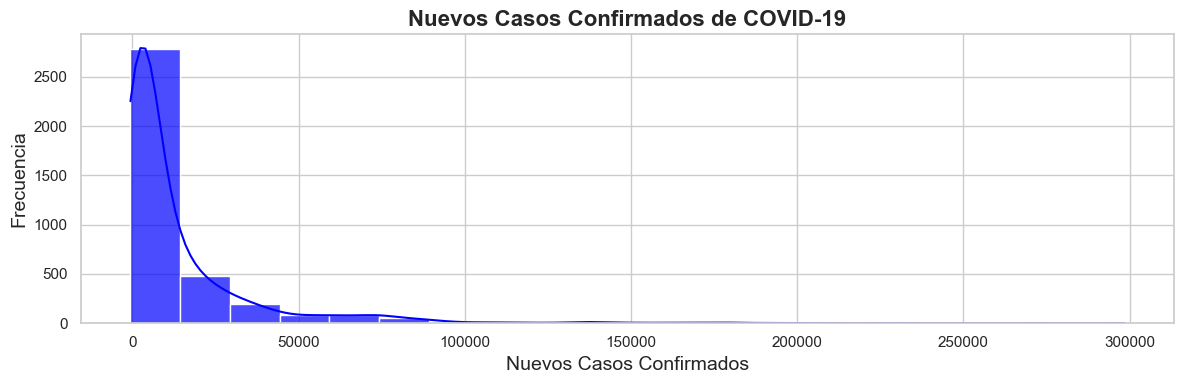

In [313]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")  # Estilo con cuadrícula blanca para mejor visualización

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(12, 4))  # Aumentar el tamaño para una mejor visualización

# Crear un histograma con un gráfico de densidad (KDE) para la columna 'new_confirmed'
# - kde=True: Añade la curva de densidad
# - bins=20: Establece el número de intervalos en el histograma
# - color='blue': Establece el color del histograma
# - alpha=0.7: Hace que el color sea un poco transparente
sns.histplot(df_paises_seleccionados_fecha_filtrada['new_confirmed'], kde=True, bins=20, color='blue', alpha=0.7)

# Establecer el título del gráfico con un tamaño de fuente más grande
plt.title('Nuevos Casos Confirmados de COVID-19', fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetar el eje X con un tamaño de fuente más grande
plt.xlabel('Nuevos Casos Confirmados', fontsize=14)  # Etiqueta del eje X

# Etiquetar el eje Y con un tamaño de fuente más grande
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje Y

# Ajustar el espacio entre los elementos del gráfico para evitar superposiciones
plt.tight_layout()  # Ajusta el diseño para que no se superpongan los elementos

# Mostrar el gráfico en pantalla
plt.show()  # Muestra el gráfico

El gráfico muestra una gran variabilidad en los casos diarios, con una tendencia general a la baja, pero con picos ocasionales.

### ***Histograma de dosis de vacunas administradas***  

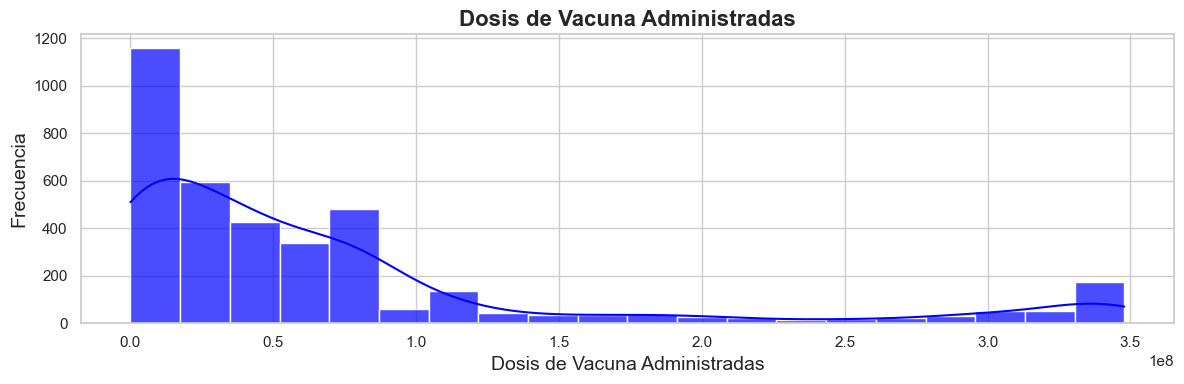

In [314]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")  # Estilo con cuadrícula blanca para mejor visualización

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(12, 4))  # Aumentar el tamaño para una mejor visualización

# Crear un histograma con un gráfico de densidad (KDE) para la columna 'cumulative_vaccine_doses_administered'
# - kde=True: Añade la curva de densidad
# - bins=20: Establece el número de intervalos en el histograma
# - color='blue': Establece el color del histograma
# - alpha=0.7: Hace que el color sea un poco transparente
sns.histplot(df_paises_seleccionados_fecha_filtrada['cumulative_vaccine_doses_administered'], kde=True, bins=20, color='blue', alpha=0.7)

# Establecer el título del gráfico con un tamaño de fuente más grande
plt.title('Dosis de Vacuna Administradas', fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetar el eje X con un tamaño de fuente más grande
plt.xlabel('Dosis de Vacuna Administradas', fontsize=14)  # Etiqueta del eje X

# Etiquetar el eje Y con un tamaño de fuente más grande
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje Y

# Ajustar el espacio entre los elementos del gráfico para evitar superposiciones
plt.tight_layout()  # Ajusta el diseño para que no se superpongan los elementos

# Mostrar el gráfico en pantalla
plt.show()  # Muestra el gráfico

El gráfico muestra una gran variabilidad en la cantidad de vacunas administradas por grupo, con una tendencia a concentrarse en dosis bajas y algunos picos que podrían indicar campañas de vacunación intensivas o acceso desigual a las vacunas.

### ***Casos nuevos confirmados por región***

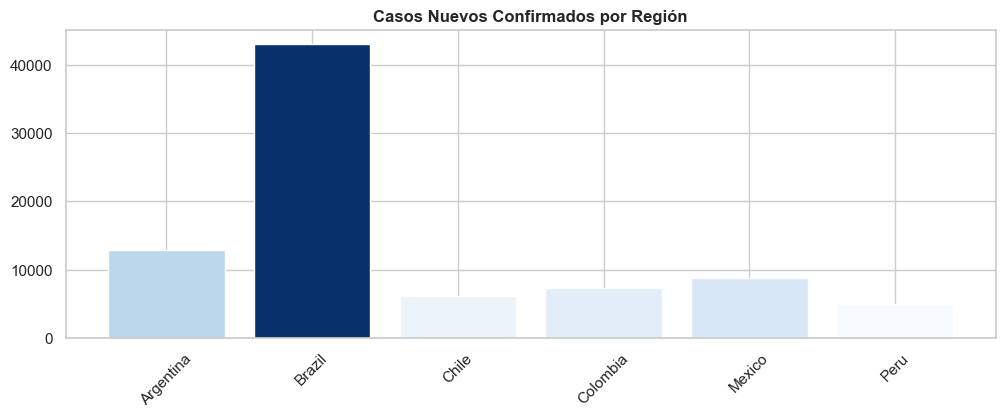

In [315]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(12, 4))

# Calcular el promedio de casos nuevos confirmados por país
avg_cases = df.groupby('country_name')['new_confirmed'].mean().reset_index()

# Normalizar los valores para el colormap
norm = plt.Normalize(avg_cases['new_confirmed'].min(), avg_cases['new_confirmed'].max())

# Crear un colormap de azul
cmap = plt.get_cmap('Blues')

# Ajustar la normalización para que el color más claro no sea tan tenue
scaled_values = norm(avg_cases['new_confirmed']) ** 0.8  # Ajusta el exponente según sea necesario

# Crear un gráfico de barras con el colormap
bars = plt.bar(avg_cases['country_name'], avg_cases['new_confirmed'], color=cmap(scaled_values))

# Establecer el título del gráfico en negrita
plt.title('Casos Nuevos Confirmados por Región', fontweight='bold')

# Rotar las etiquetas del eje X 45 grados para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico en pantalla
plt.show()

El gráfico muestra que Brasil tuvo un número significativamente mayor de nuevos casos confirmados de COVID-19 en comparación con los otros países de América Latina presentados, sugiriendo una mayor tasa de transmisión del virus en ese país durante el período analizado.

### ***Mapa de calor de correlaciones entre variables_covid***

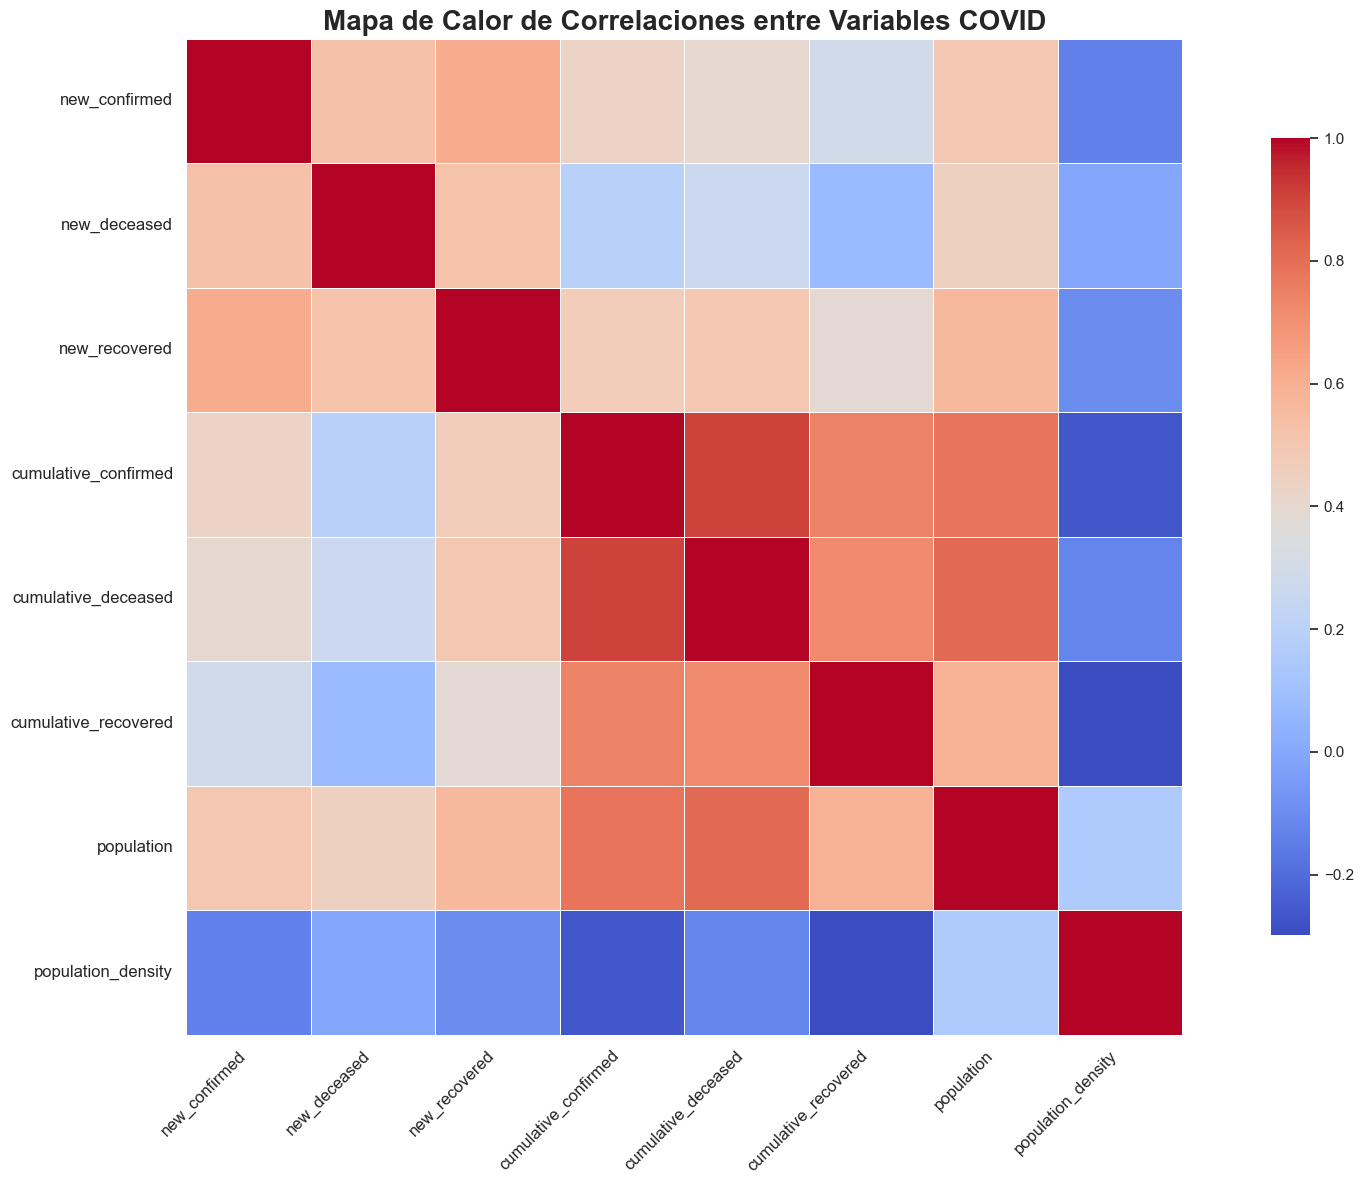

In [316]:
# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(18, 12))  # Aumentar aún más el tamaño del gráfico

# Crear un mapa de calor para visualizar la matriz de correlaciones
# - 'correlaciones' es la matriz que se va a visualizar
# - 'annot=False' indica que no se mostrarán los valores en las celdas
# - 'cmap='coolwarm'' establece el esquema de colores del mapa de calor
# - 'linewidths=0.5' establece el ancho de las líneas que separan las celdas
# - 'cbar_kws={"shrink": .8}' ajusta el tamaño de la barra de color
# - 'square=True' hace que las celdas sean cuadradas
sns.heatmap(correlaciones, annot=False, cmap='coolwarm', linewidths=0.5, 
            cbar_kws={"shrink": .8}, square=True)

# Establecer el título del gráfico
plt.title("Mapa de Calor de Correlaciones entre Variables COVID", fontsize=20, fontweight='bold')  # Título más destacado

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar etiquetas del eje X y alinearlas a la derecha
plt.yticks(fontsize=12, rotation=0)               # Mantener etiquetas del eje Y en horizontal

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas
plt.show()  # Mostrar el gráfico en pantalla

Un mapa de calor como este nos permite visualizar rápidamente las relaciones entre diferentes variables.

### ***Diagrama de dispersión de la temperatura media contra los casos confirmados***

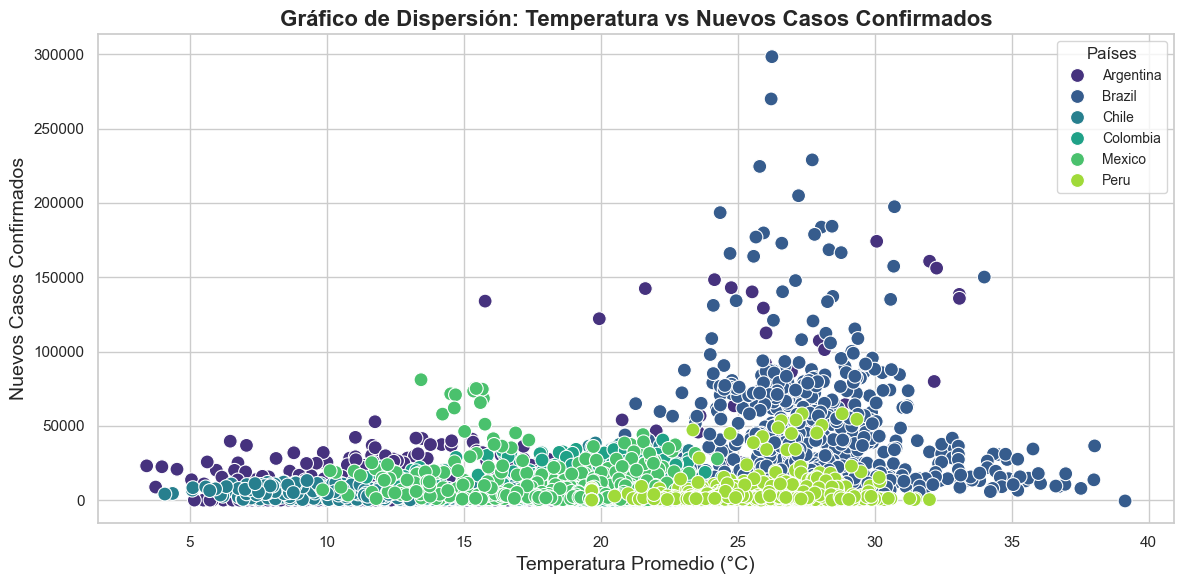

In [317]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico

# Crear un gráfico de dispersión
# 'data=df' especifica el DataFrame a utilizar
# 'x='average_temperature'' establece el eje X con la temperatura promedio
# 'y='new_confirmed'' establece el eje Y con los nuevos casos confirmados
# 'hue='country_name'' colorea los puntos según el país
# 'palette='viridis'' establece la paleta de colores
# 's=100' establece el tamaño de los puntos
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='viridis', s=100)

# Establecer el título del gráfico
plt.title("Gráfico de Dispersión: Temperatura vs Nuevos Casos Confirmados", fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetas de los ejes
plt.xlabel("Temperatura Promedio (°C)", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Nuevos Casos Confirmados", fontsize=14)   # Etiqueta del eje Y

# Ajustar el tamaño de la leyenda
plt.legend(title='Países', fontsize=10, title_fontsize='12')  # Añadir leyenda para identificar los países

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas
plt.show()  # Mostrar el gráfico

El gráfico muestra que no existe una relación directa entre la temperatura promedio y el número de nuevos casos de COVID-19 en los países latinoamericanos analizados, sugiriendo que otros factores más allá del clima influyen significativamente en la propagación del virus.

### ***Diagrama de dispersión de la temperatura media contra las muertes confirmadas***

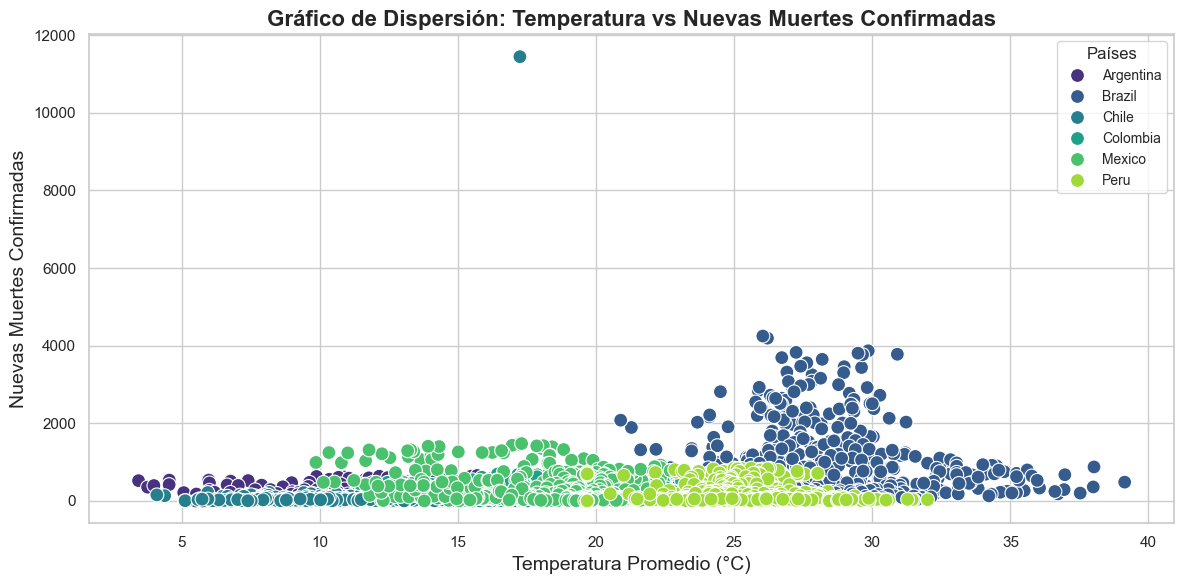

In [318]:
# Segundo gráfico: Gráfico de Dispersión
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico (ancho, alto)

# Crear un gráfico de dispersión
# - 'data=df' especifica el DataFrame a utilizar
# - 'x='average_temperature'' establece el eje X con la temperatura promedio en Celsius
# - 'y='new_deceased'' establece el eje Y con el número de nuevas muertes confirmadas
# - 'hue='country_name'' colorea los puntos según el país
# - 'palette='viridis'' establece la paleta de colores para los puntos
# - 's=100' establece el tamaño de los puntos en el gráfico
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_deceased', hue='country_name', palette='viridis', s=100)

# Establecer el título del gráfico
plt.title("Gráfico de Dispersión: Temperatura vs Nuevas Muertes Confirmadas", fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetas de los ejes
plt.xlabel("Temperatura Promedio (°C)", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Nuevas Muertes Confirmadas", fontsize=14)  # Etiqueta del eje Y

# Ajustar el tamaño de la leyenda
plt.legend(title='Países', fontsize=10, title_fontsize='12')  # Añadir leyenda para identificar los países

# Ajustar el espacio para que no se superpongan las etiquetas
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico en pantalla

El gráfico no muestra una relación clara entre la temperatura y el número de muertes por COVID-19. Los puntos están muy dispersos, lo que sugiere que otros factores, como las políticas sanitarias de cada país y el acceso a la salud, influyen más en la mortalidad.

### ***Matriz de correlación, valores mayores a 0.5***

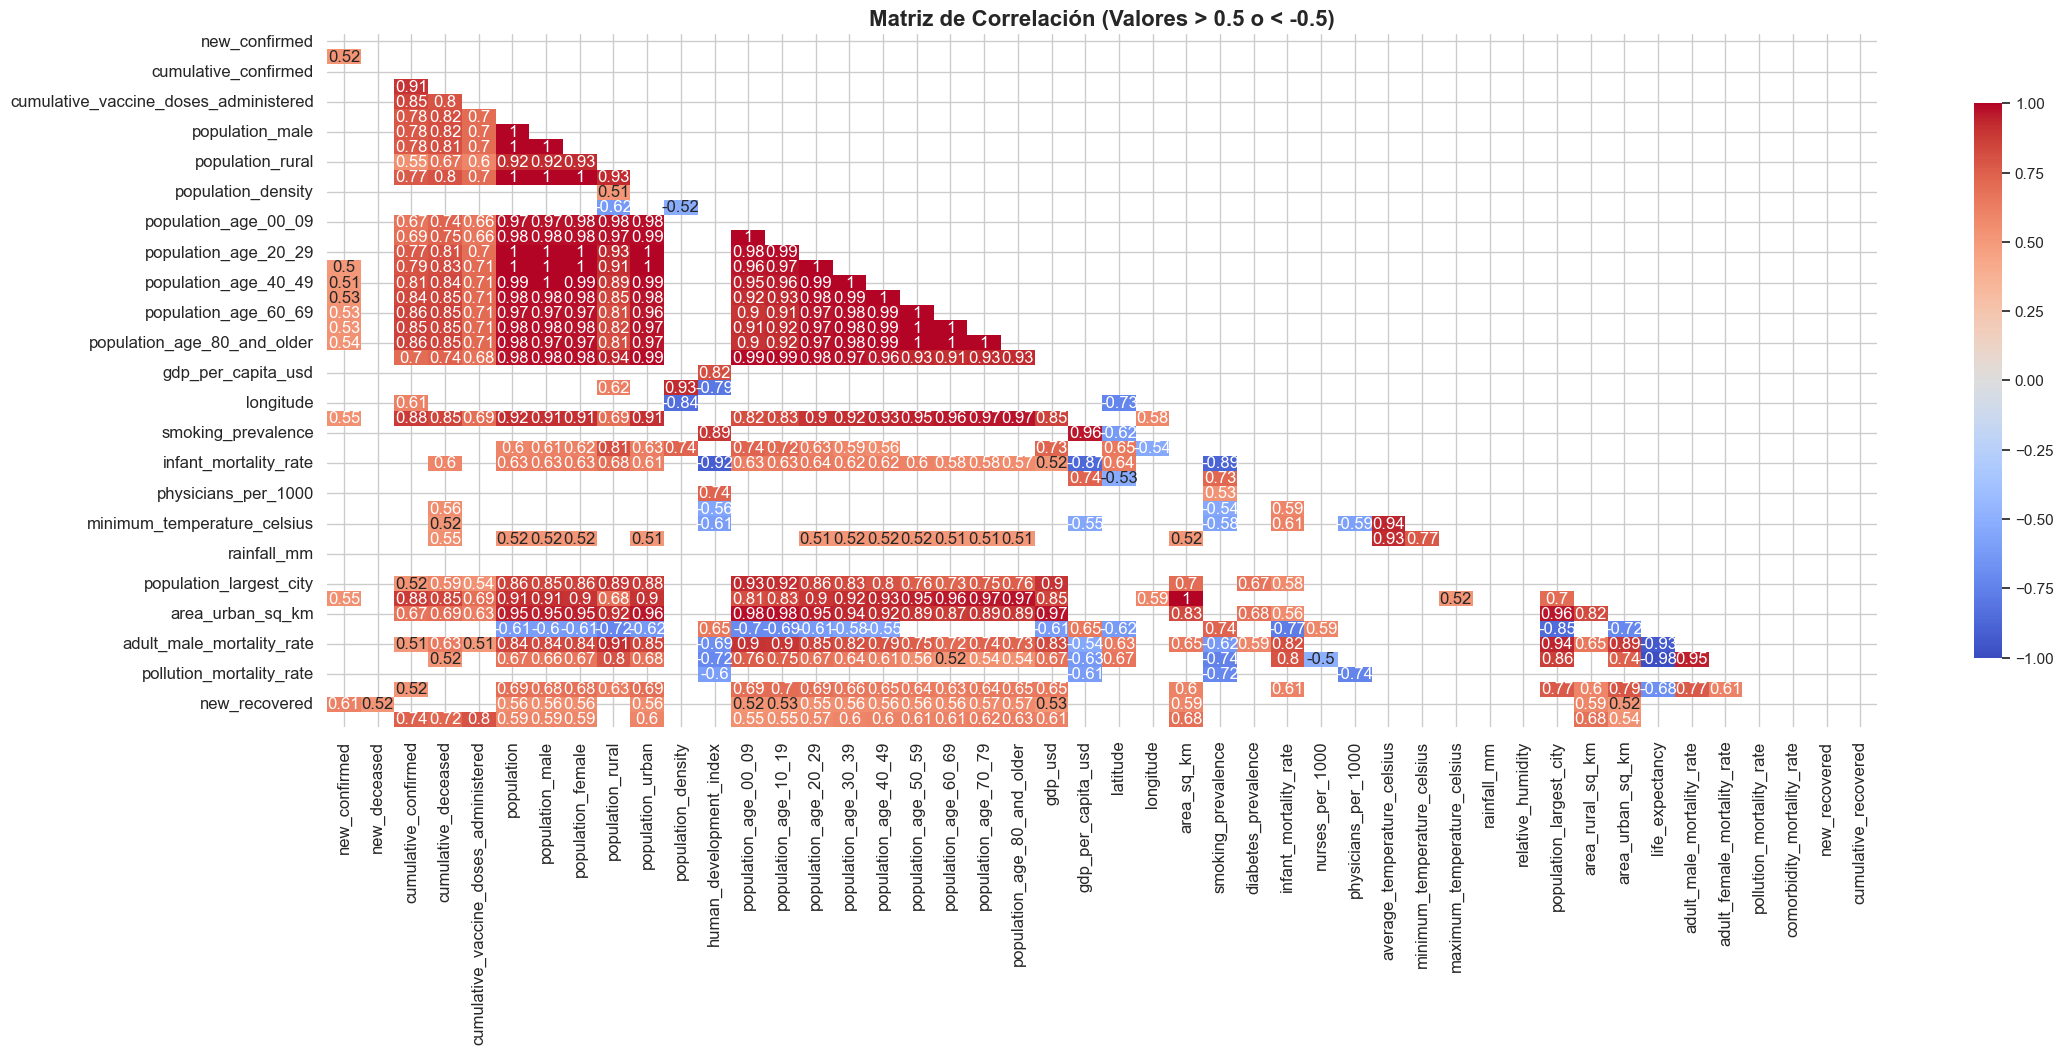

In [319]:
# Matriz de correlación con submáscara y filtro de correlación > 0.5

# Filtrar solo columnas numéricas
correlaciones = df.select_dtypes(include=[np.number]).corr()  # Calcula la matriz de correlación solo para columnas numéricas

# Crear máscara para solo la mitad superior de la matriz
mask = np.triu(np.ones_like(correlaciones, dtype=bool))  # Crea una máscara para ocultar la mitad inferior de la matriz

# Aplicar filtro para mostrar solo correlaciones mayores a 0.5 o menores a -0.5
filtered_corr = correlaciones.where((correlaciones > 0.5) | (correlaciones < -0.5), np.nan)  # Filtra las correlaciones

# Graficar con Seaborn y mostrar solo valores > 0.5
plt.figure(figsize=(25, 9))  # Ajusta el tamaño del gráfico
sns.heatmap(filtered_corr, annot=True, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={"shrink": .8})  # Crea un mapa de calor
plt.title('Matriz de Correlación (Valores > 0.5 o < -0.5)', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xticks(fontsize=12)  # Ajustar tamaño de las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustar tamaño de las etiquetas del eje Y
plt.show()  # Mostrar el gráfico


El mapa de calor revela relaciones significativas entre diversas variables del COVID-19. Los colores indican la fuerza de estas relaciones: rojo para correlaciones positivas fuertes (variables que tienden a aumentar juntas), azul para correlaciones negativas (variables que tienden a variar en direcciones opuestas) y blanco para correlaciones débiles.

### ***Histogramas de las variables que “sí” tenga cambios de valores***

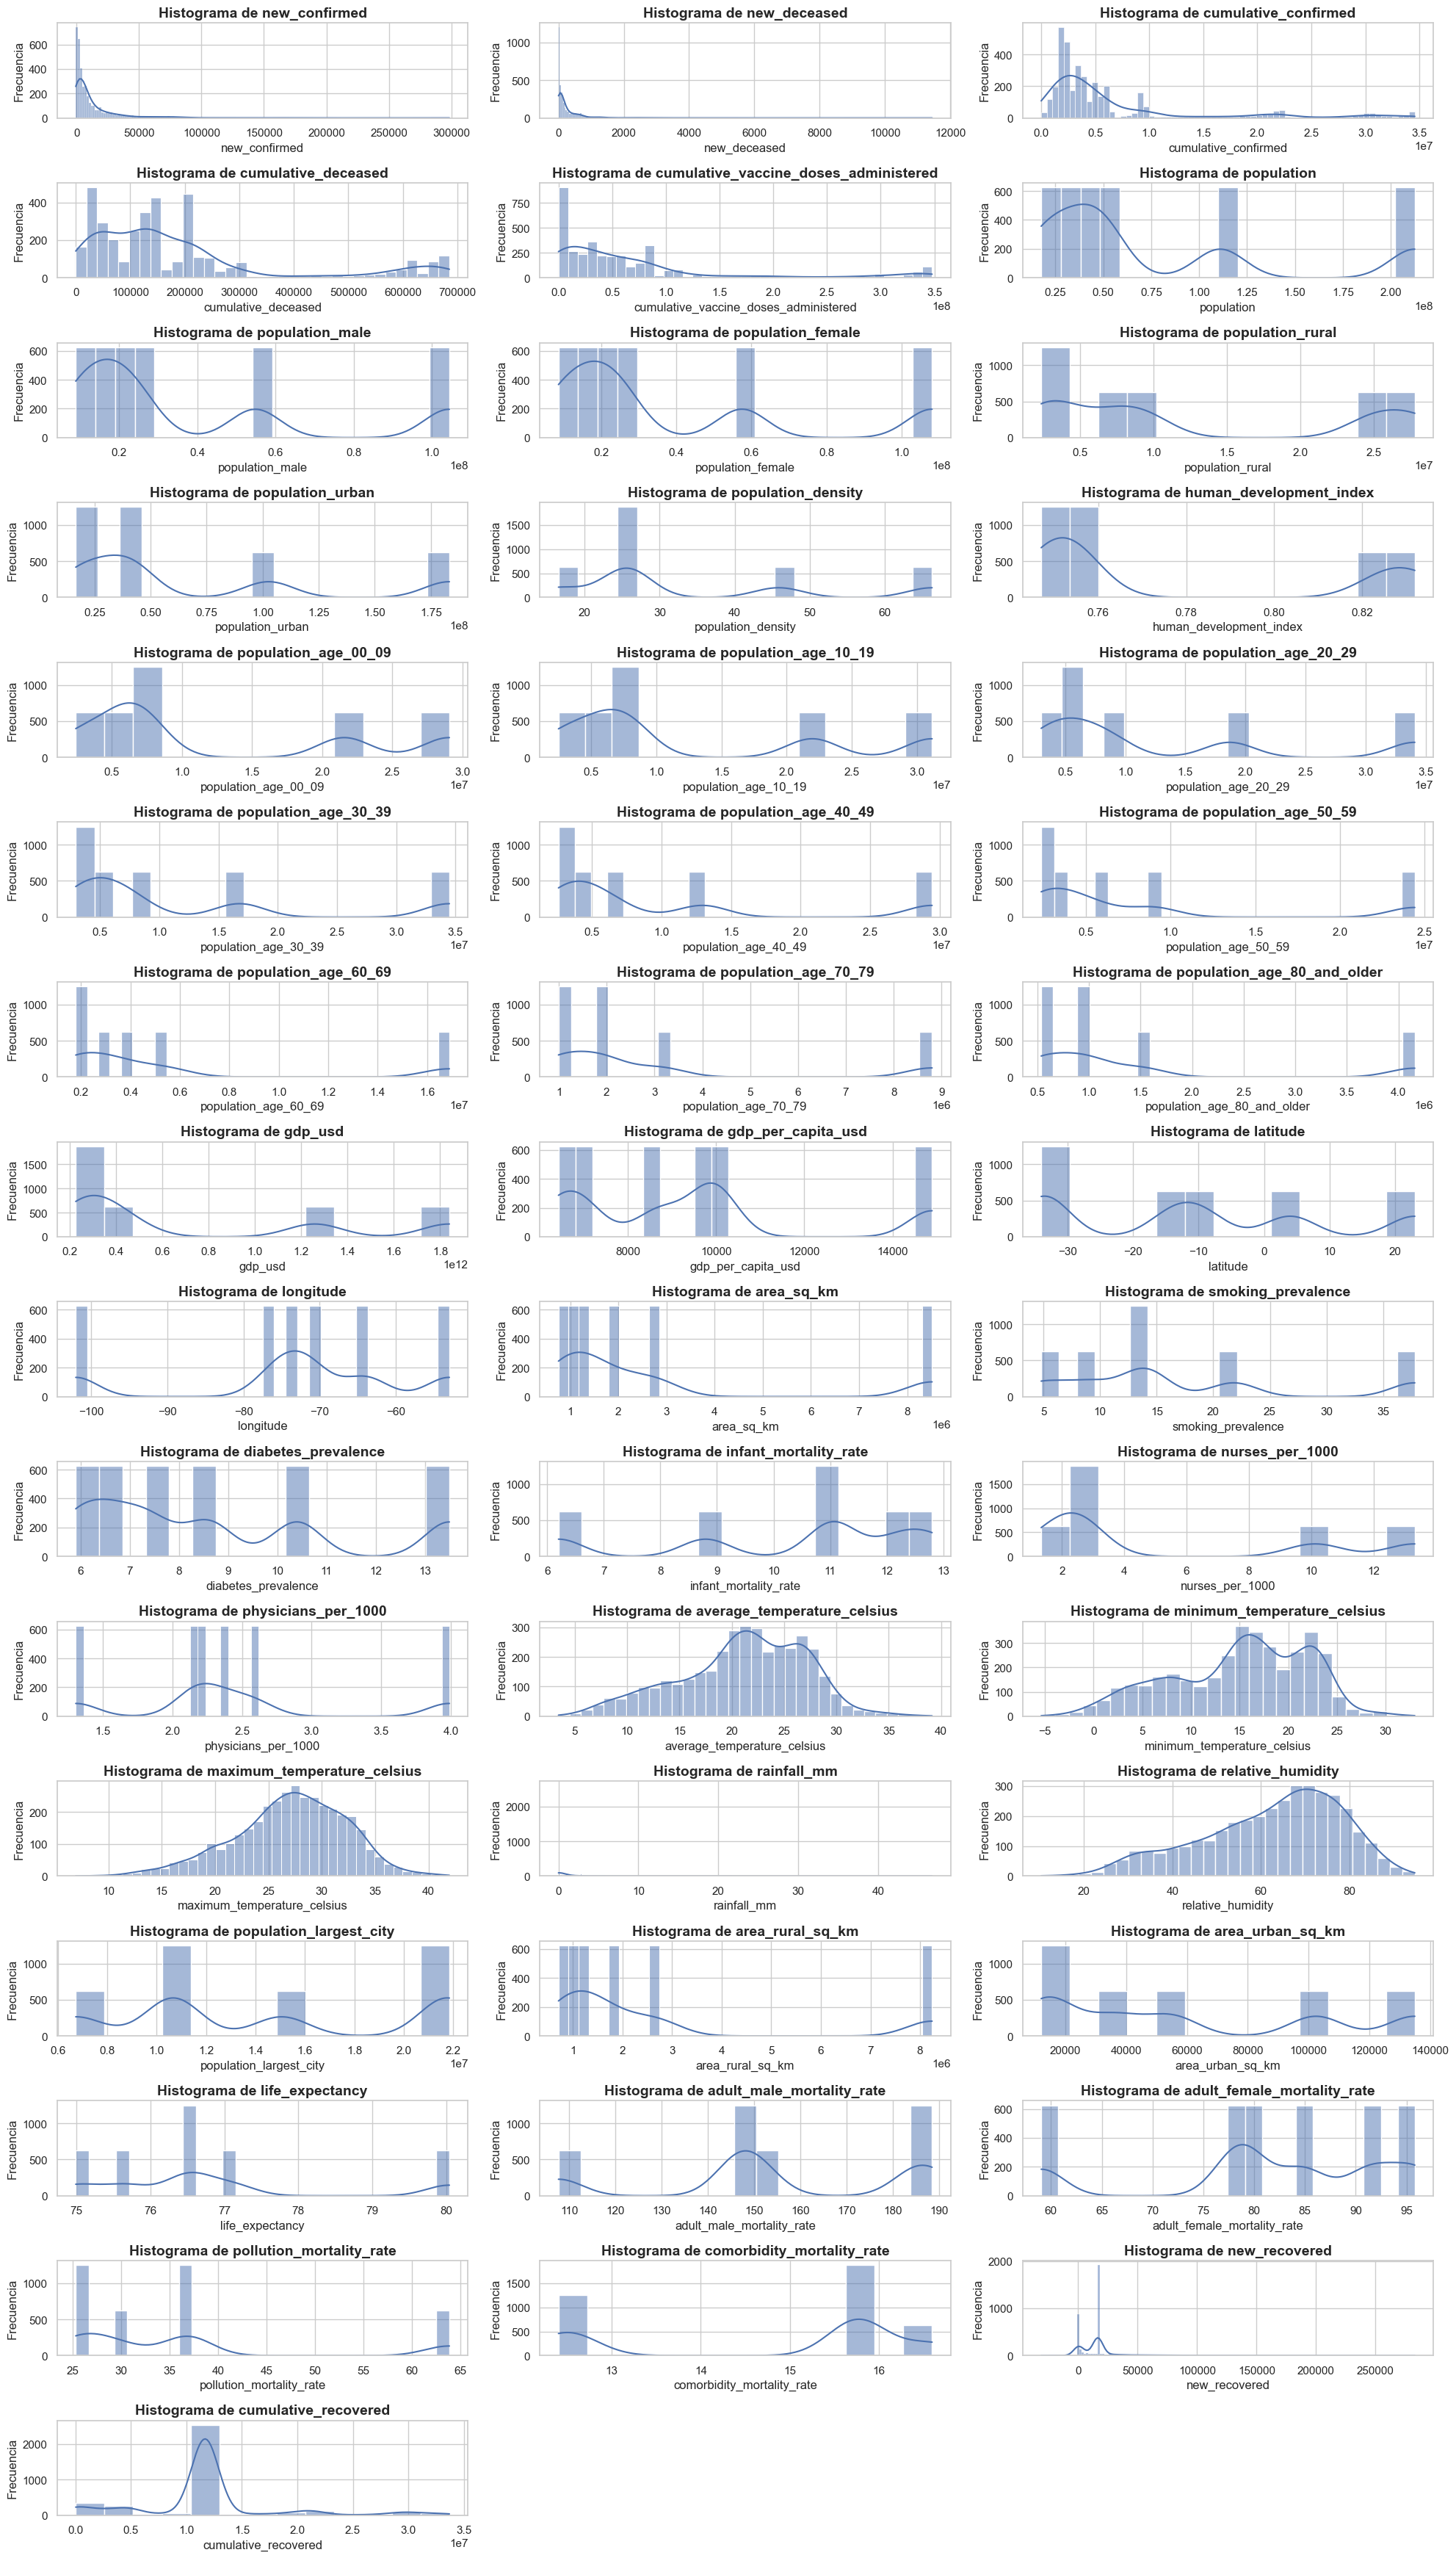

In [320]:
# Filtrar solo las columnas numéricas
numerical_columns = df.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas del DataFrame

# Identificar columnas que tienen cambios de valores (no constantes)
variables_con_cambios = numerical_columns.columns[numerical_columns.nunique() > 1]  # Filtra columnas con más de un valor único

# Crear histogramas para cada variable con cambios de valores
plt.figure(figsize=(20, 35))  # Ajustar el tamaño de la figura

# Iterar sobre las variables con cambios de valores
for i, column in enumerate(variables_con_cambios, 1):
    plt.subplot(len(variables_con_cambios) // 3 + 1, 3, i)  # Crear subgráficos en una cuadrícula
    sns.histplot(df[column], kde=True)  # Crear un histograma con densidad (KDE)
    plt.title(f'Histograma de {column}', fontsize=14, fontweight='bold')  # Título del histograma
    plt.xlabel(column, fontsize=12)  # Etiqueta del eje X
    plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta del eje Y

plt.tight_layout()  # Ajustar el layout para que no se superpongan los subgráficos
plt.show()  # Mostrar el gráfico

Los histogramas son una representación gráfica de la distribución de una variable. En este caso, nos ofrecen una visión detallada de cómo se distribuyen las diferentes variables relacionadas con el COVID-19, como el número de nuevos casos, el número de fallecidos, la población, etc.

### ***Comportamiento de las dosis administradas de todos los países (valor medio)***

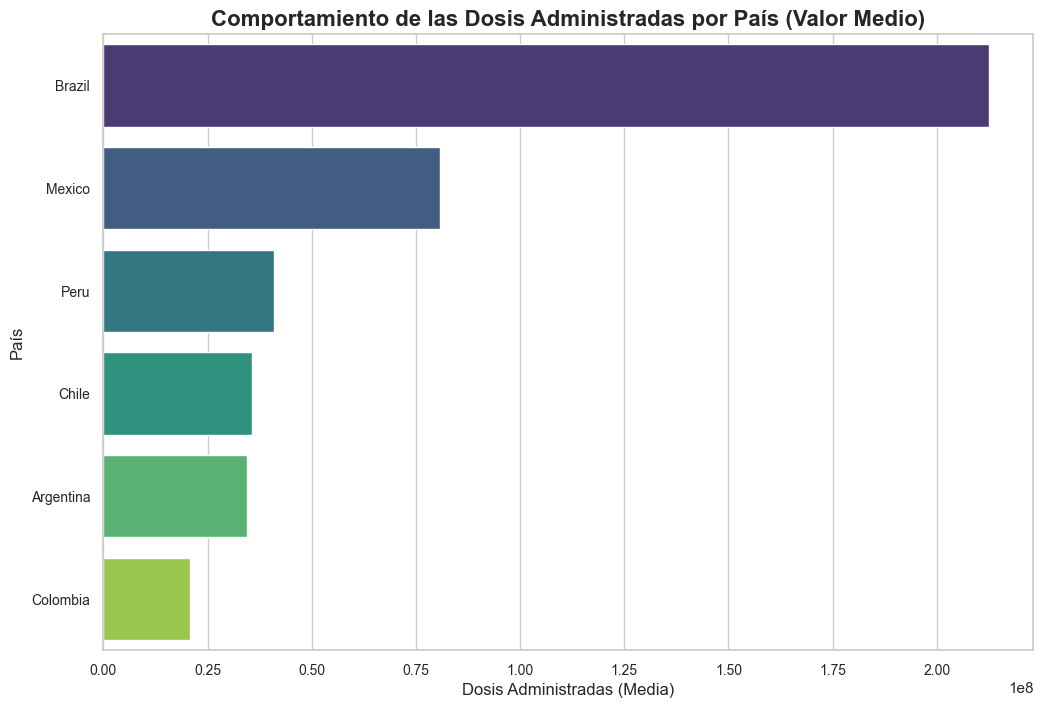

In [321]:
# Calcular la media de dosis administradas por país
media_dosis = df.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()  
# Agrupa el DataFrame por 'country_name' y calcula la media de 'cumulative_vaccine_doses_administered' para cada país

# Ordenar los países por la media de dosis administradas
media_dosis = media_dosis.sort_values(by='cumulative_vaccine_doses_administered', ascending=False)  
# Ordena el DataFrame resultante de mayor a menor según la media de dosis administradas

# Graficar el comportamiento de las dosis administradas
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
sns.barplot(x='cumulative_vaccine_doses_administered', y='country_name', data=media_dosis, hue='country_name', palette='viridis', legend=False)  
# Crea un gráfico de barras con las dosis administradas en el eje X y los países en el eje Y

plt.title('Comportamiento de las Dosis Administradas por País (Valor Medio)', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Dosis Administradas (Media)', fontsize=12)  # Etiqueta del eje X
plt.ylabel('País', fontsize=12)  # Etiqueta del eje Y
plt.xticks(fontsize=10)  # Ajustar tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar tamaño de las etiquetas del eje Y
plt.show()  # Mostrar el gráfico

El gráfico muestra que Brasil lidera en el promedio de dosis de vacunas COVID-19 administradas entre los países de América Latina, seguido por México, Perú, Chile, Argentina y Colombia. 

### ***Evolución de dosis administradas por mes de cada país***

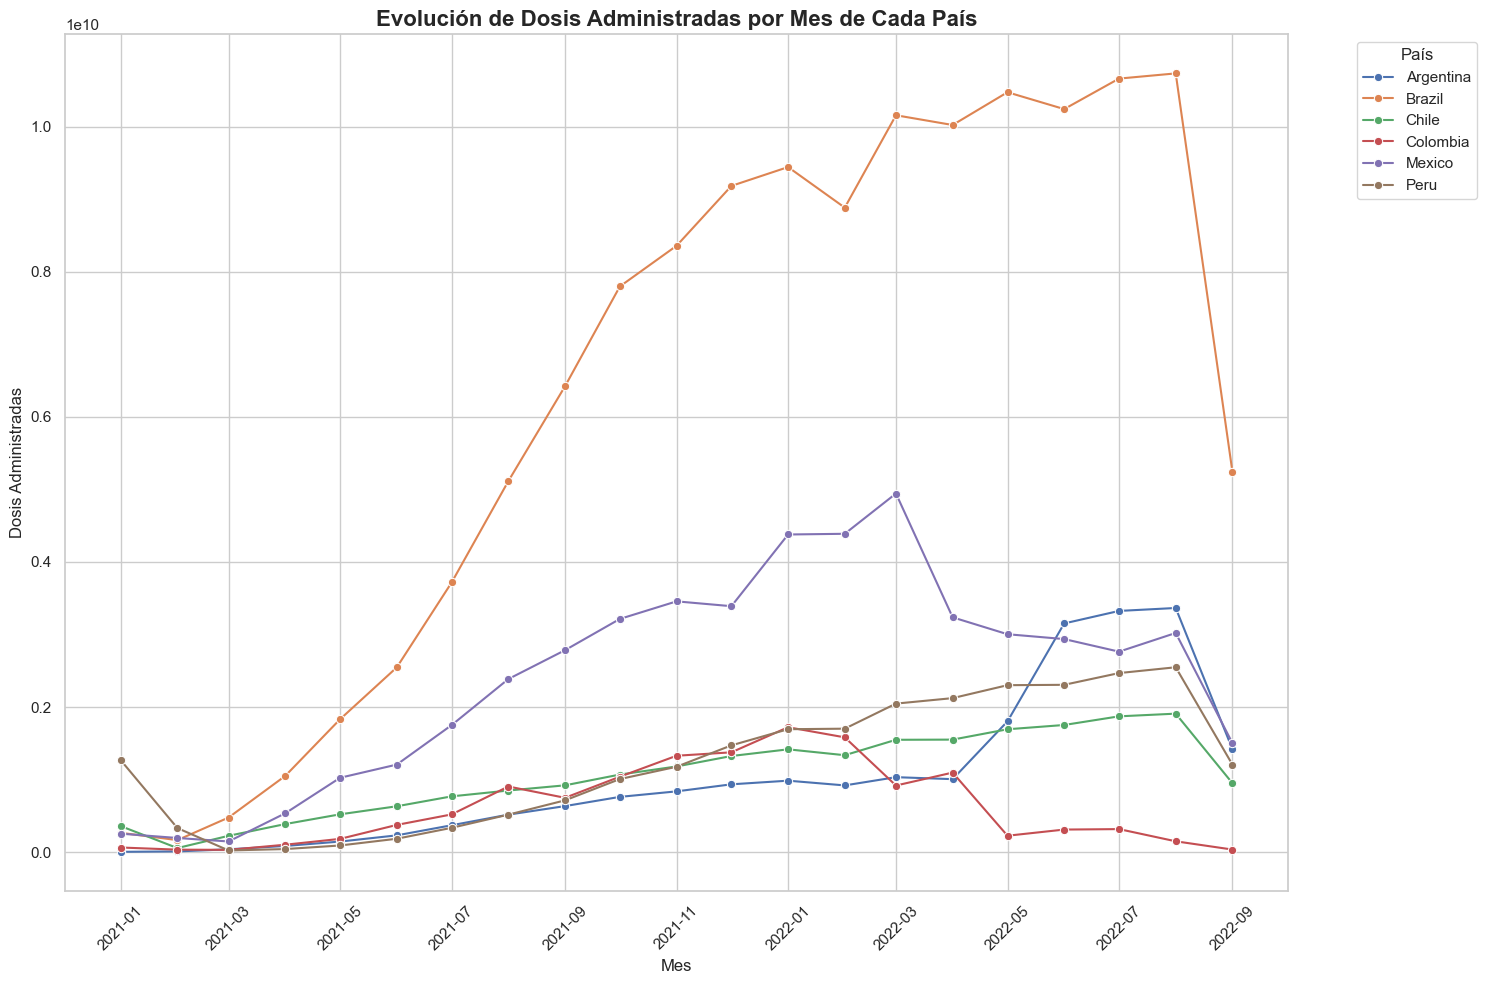

In [322]:
# Asegúrate de que la columna de fecha esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])  # Convierte la columna 'date' a formato de fecha

# Agrupar por país y mes, y sumar las dosis administradas
dosis_por_mes = df.groupby(['country_name', df['date'].dt.to_period('M')])['cumulative_vaccine_doses_administered'].sum().reset_index()  
# Agrupa el DataFrame por 'country_name' y por mes, y suma las dosis administradas

# Convertir la columna de periodo a fecha para la visualización
dosis_por_mes['date'] = dosis_por_mes['date'].dt.to_timestamp()  # Convierte el periodo a un timestamp para graficar

# Graficar la evolución de dosis administradas por mes para cada país
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.lineplot(data=dosis_por_mes, x='date', y='cumulative_vaccine_doses_administered', hue='country_name', marker='o')  
# Crea un gráfico de líneas con las dosis administradas en el eje Y y el tiempo en el eje X

plt.title('Evolución de Dosis Administradas por Mes de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Mes', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Dosis Administradas', fontsize=12)  # Etiqueta del eje Y
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico

El gráfico muestra la evolución mensual del número total de dosis de vacunas COVID-19 administradas en Brasil, México, Perú, Chile, Argentina y Colombia, evidenciando un aumento progresivo en la mayoría de los países hasta alcanzar un pico y luego una disminución gradual.

### ***Muertes por mes de cada país***

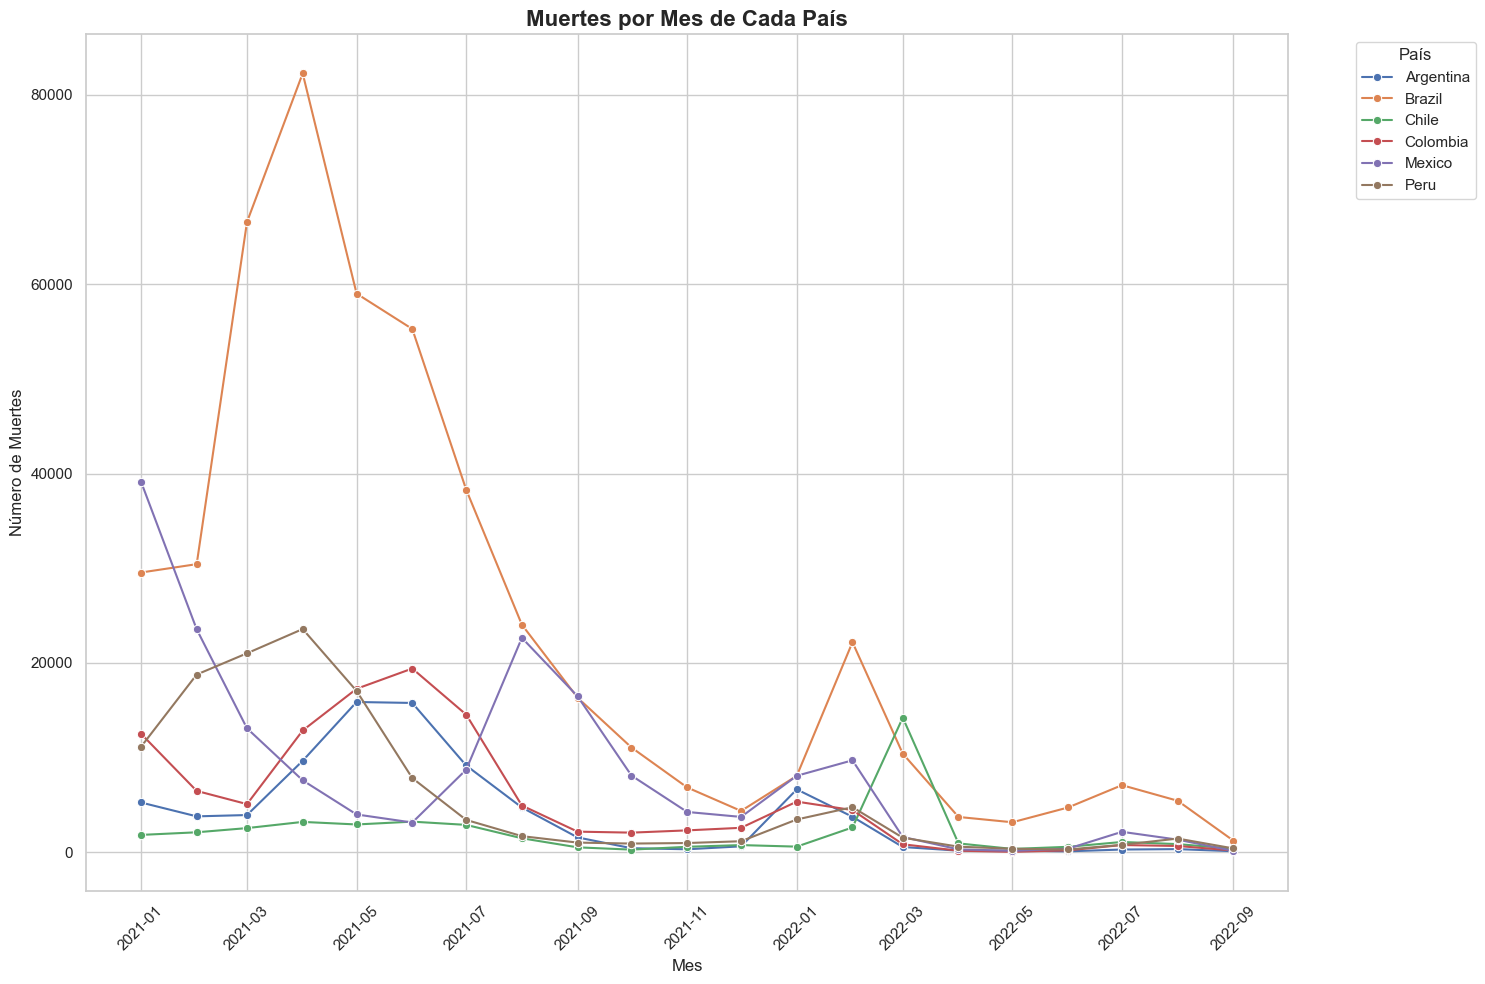

In [323]:
# Agrupar por país y mes, y sumar las muertes
muertes_por_mes = df.groupby(['country_name', df['date'].dt.to_period('M')])['new_deceased'].sum().reset_index()  
# Agrupa el DataFrame por 'country_name' y por mes, y suma el número de muertes

# Convertir la columna de periodo a fecha para la visualización
muertes_por_mes['date'] = muertes_por_mes['date'].dt.to_timestamp()  
# Convierte el periodo a un timestamp para graficar

# Graficar las muertes por mes para cada país
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.lineplot(data=muertes_por_mes, x='date', y='new_deceased', hue='country_name', marker='o')  
# Crea un gráfico de líneas con el número de muertes en el eje Y y el tiempo en el eje X

plt.title('Muertes por Mes de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Mes', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Número de Muertes', fontsize=12)  # Etiqueta del eje Y
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico

El gráfico muestra un descenso general en el número de muertes por COVID-19 a lo largo del tiempo en los países de América Latina, con picos variables que coinciden con olas de contagios, pero con una tendencia a la baja en la mayoría de los países.

### ***Casos confirmados por mes de cada país***

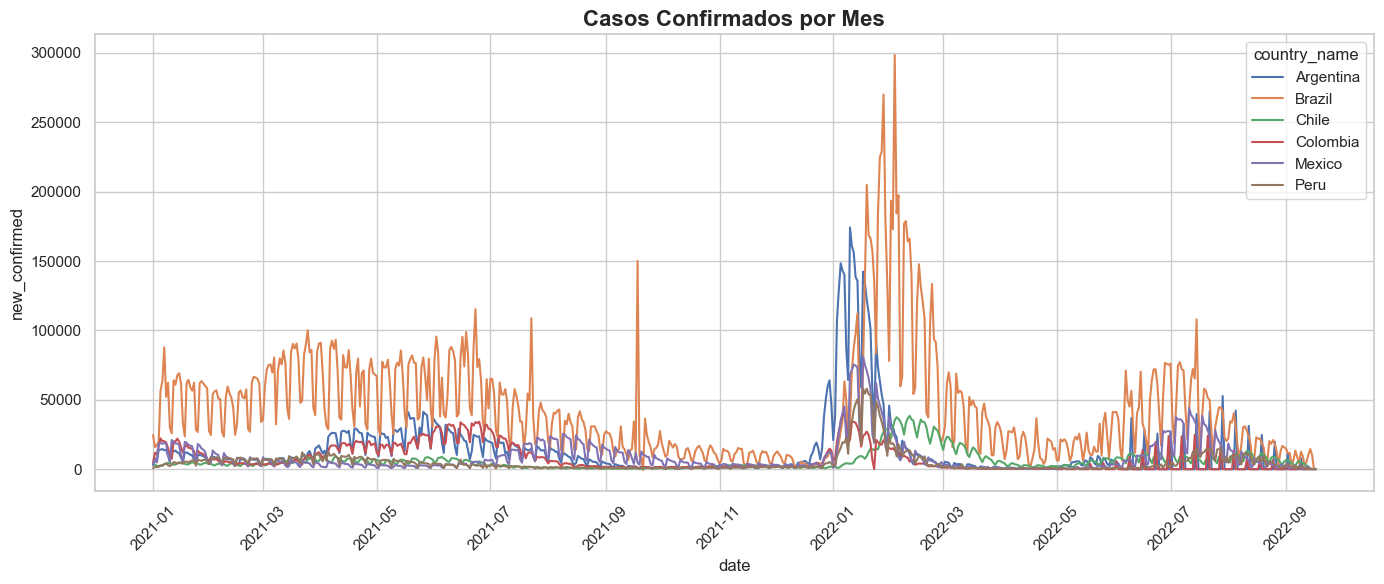

In [324]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Establece el tamaño de la figura
plt.figure(figsize=(14, 6))  

# Crea un gráfico de líneas con los casos confirmados en el eje Y y el tiempo en el eje X
sns.lineplot(data=df, x='date', y='new_confirmed', hue='country_name', markers=True)  

# Título del gráfico
plt.title('Casos Confirmados por Mes', fontsize=16, fontweight='bold')  

# Formato de fecha en el eje X
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))  

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)  

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()  

El gráfico muestra la evolución de los nuevos casos confirmados de COVID-19 por mes en Argentina, Brasil, Chile, Colombia, México y Perú, evidenciando picos y valles que indican olas de contagios y períodos de menor transmisión, con una tendencia general a la baja a lo largo del tiempo.

### ***Recuperaciones de casos por mes de cada país***

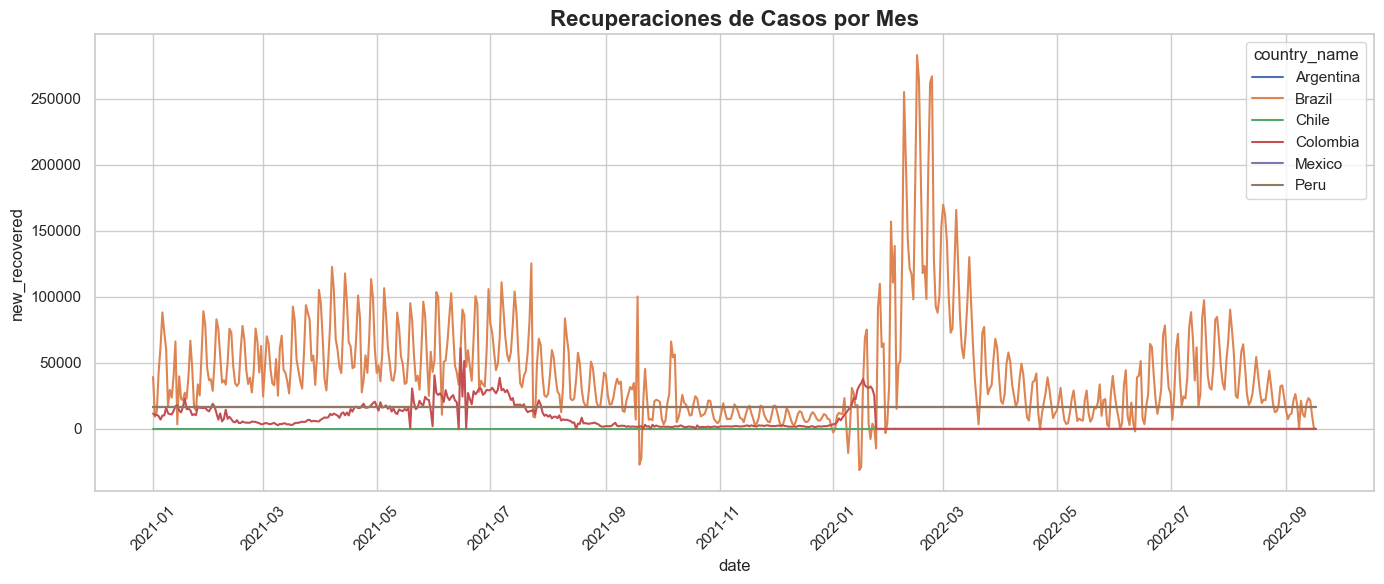

In [325]:
# Establece el tamaño de la figura
plt.figure(figsize=(14, 6))  

# Crea un gráfico de líneas con las recuperaciones en el eje Y y el tiempo en el eje X
sns.lineplot(data=df, x='date', y='new_recovered', hue='country_name', markers=True)  

# Título del gráfico
plt.title('Recuperaciones de Casos por Mes', fontsize=16, fontweight='bold')  

# Formato de fecha en el eje X
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))  

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)  

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()  

El gráfico muestra la evolución mensual del número de nuevas recuperaciones de casos de COVID-19 en Argentina, Brasil, Chile, Colombia, México y Perú, evidenciando picos y valles que indican períodos de mayor y menor recuperación, con una tendencia general a la baja en la mayoría de los países.

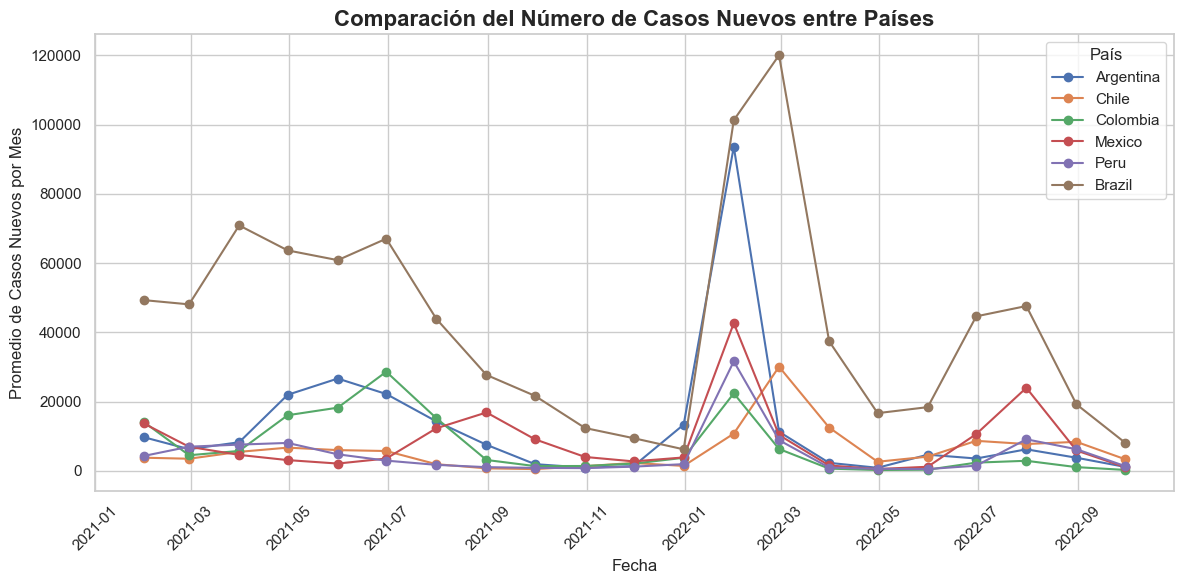

In [326]:
# Lista de países a filtrar
paises_filtrados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date', 'new_confirmed'])  # Elimina filas donde 'date' es NaT o 'new_confirmed' es NaN

# Crear la figura para el gráfico
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Agrupar por país y resamplear por mes, calculando el promedio mensual
for pais in paises_filtrados:
    # Filtrar por país y calcular el promedio mensual
    promedio_mensual = df[df['country_name'] == pais].groupby(pd.Grouper(key='date', freq='ME'))['new_confirmed'].mean()
    
    # Graficar con líneas y puntos
    plt.plot(promedio_mensual.index, promedio_mensual, label=pais, marker='o')  # Agregar puntos

# Configurar el gráfico
plt.legend(title='País')  # Añadir leyenda con título
plt.title('Comparación del Número de Casos Nuevos entre Países', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Fecha', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Promedio de Casos Nuevos por Mes', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico muestra la evolución del promedio de nuevos casos de COVID-19 por mes en Argentina, Chile, Colombia, México, Perú y Brasil, evidenciando picos y valles que indican olas de contagios y períodos de menor transmisión, con una tendencia general a la baja en la mayoría de los países.

### ***Dosis acumuladas por país***

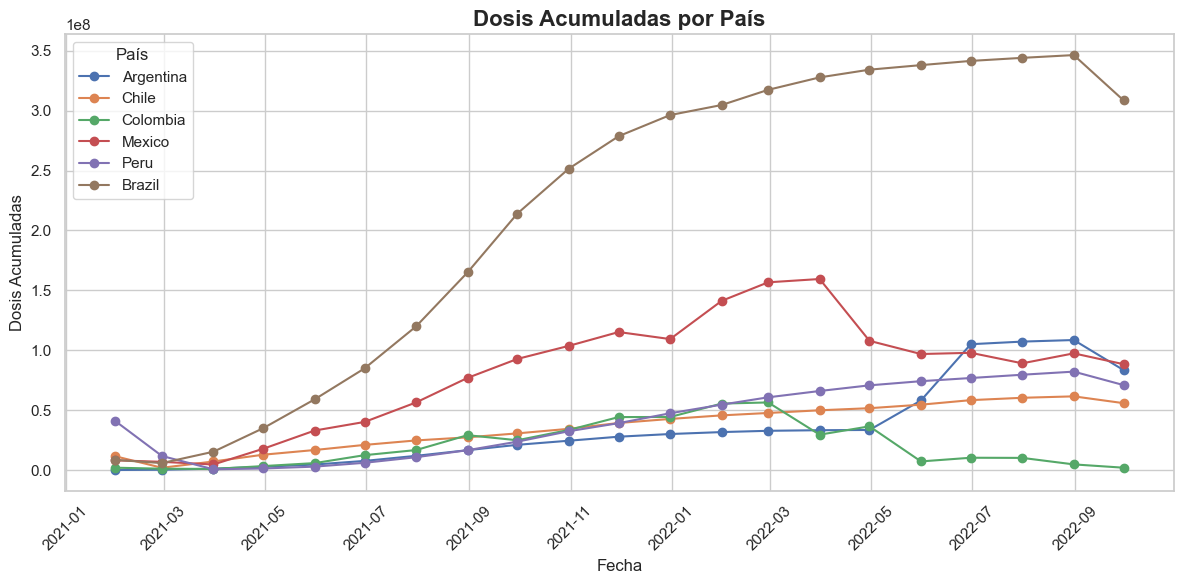

In [327]:
# Lista de países a filtrar
paises_filtrados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date', 'cumulative_vaccine_doses_administered'])  # Elimina filas donde 'date' es NaT o 'cumulative_vaccine_doses_administered' es NaN

# Crear la figura para el gráfico
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Agrupar por país y resamplear por mes, calculando el promedio mensual de dosis acumuladas
for pais in paises_filtrados:
    # Filtrar por país y calcular el promedio mensual de dosis acumuladas
    dosis_acumuladas = df[df['country_name'] == pais].groupby(pd.Grouper(key='date', freq='ME'))['cumulative_vaccine_doses_administered'].mean()
    
    # Graficar con líneas y puntos
    plt.plot(dosis_acumuladas.index, dosis_acumuladas, label=pais, marker='o')  # Agregar puntos

# Configurar el gráfico
plt.legend(title='País')  # Añadir leyenda con título
plt.title('Dosis Acumuladas por País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Fecha', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Dosis Acumuladas', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico muestra un aumento progresivo en el número total de dosis de vacunas COVID-19 administradas en Brasil, seguido por Argentina, Chile, México, Perú y Colombia, con algunas fluctuaciones a lo largo del tiempo.

### ***Boxplot de temperatura media de cada país***

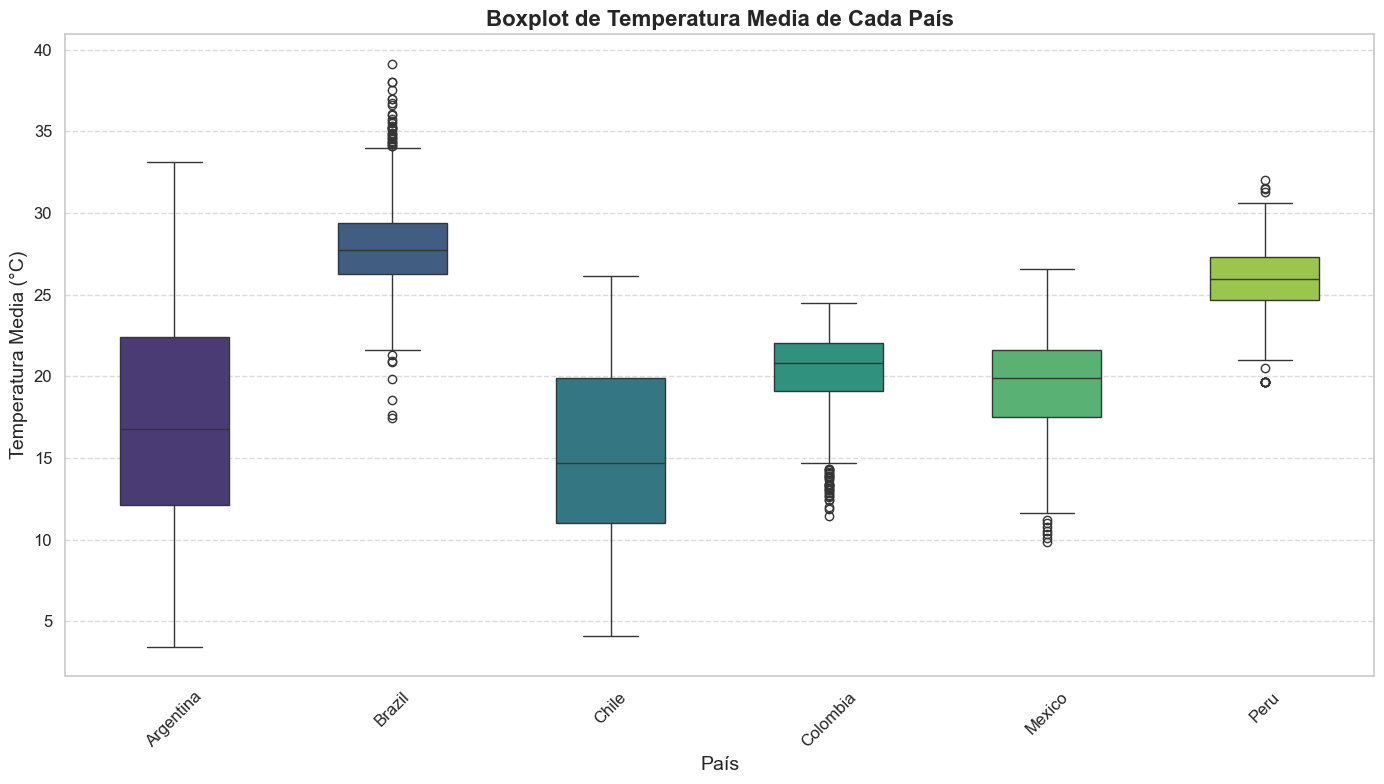

In [328]:
# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date'])  # Elimina filas donde 'date' es NaT (no es una fecha)

# Crear la figura para el boxplot
plt.figure(figsize=(14, 8))  # Establece el tamaño de la figura

# Establecer el estilo de fondo
sns.set(style="whitegrid")  # Establece el estilo de fondo

# Crear el boxplot con 'hue' para asignar colores a cada país
boxplot = sns.boxplot(x='country_name', y='average_temperature_celsius', data=df, width=0.5, hue='country_name', palette='viridis', dodge=False)  # Asegúrate de que la columna se llama 'average_temperature'

# Configurar el gráfico
plt.title('Boxplot de Temperatura Media de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Temperatura Media (°C)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de caja y bigotes muestra que la temperatura media anual en Brasil es la más alta entre los países presentados, seguida de México y Colombia, mientras que Argentina presenta la temperatura media más baja.

### ***Violinplot de las variables que “sí” tenga cambios de valores***

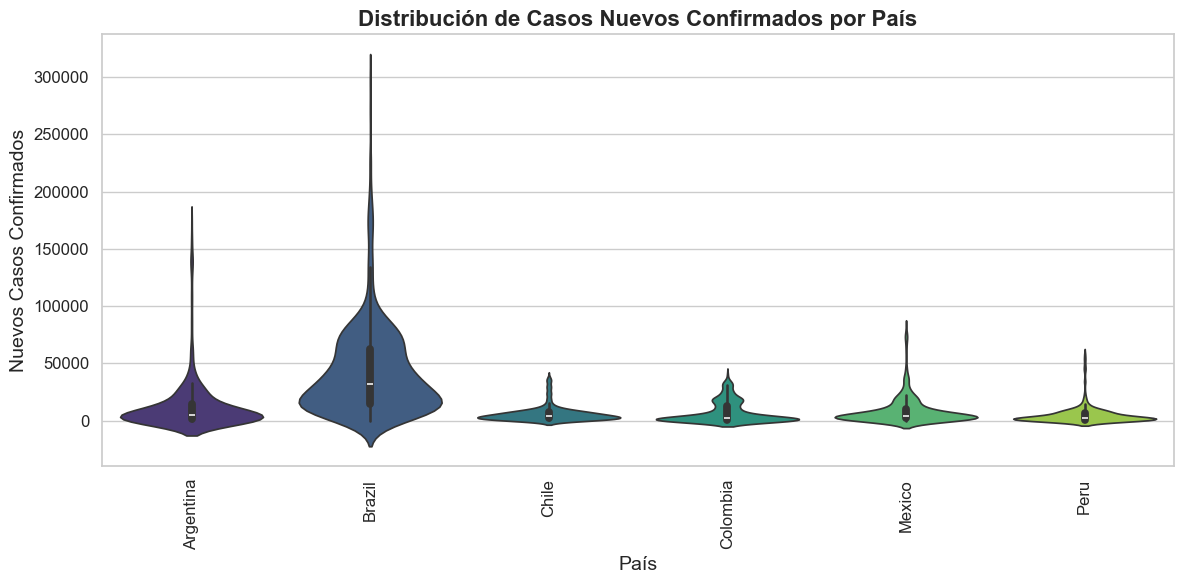

In [329]:
# Asegúrate de que 'new_confirmed' no tiene valores nulos
df = df.dropna(subset=['new_confirmed'])  # Elimina filas donde 'new_confirmed' es NaN

# Violinplot de variables COVID con cambios de valores significativos
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Establecer el estilo de fondo
sns.set(style="whitegrid")  # Establece el estilo de fondo

# Crear el violinplot con 'hue' para asignar colores a cada país
sns.violinplot(data=df, x='country_name', y='new_confirmed', hue='country_name', palette='viridis', legend=False)  # 'data' es el DataFrame, 'x' es el eje X y 'y' es el eje Y

# Configurar el gráfico
plt.title('Distribución de Casos Nuevos Confirmados por País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=90, fontsize=12)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de violín muestra la distribución de nuevos casos de COVID-19 por día en seis países latinoamericanos, revelando que Brasil y México presentaron los picos de contagios más altos y una mayor variabilidad, mientras que Chile y Perú mostraron una menor dispersión en sus datos.

### ***Distribución de la población por grupos de edad***

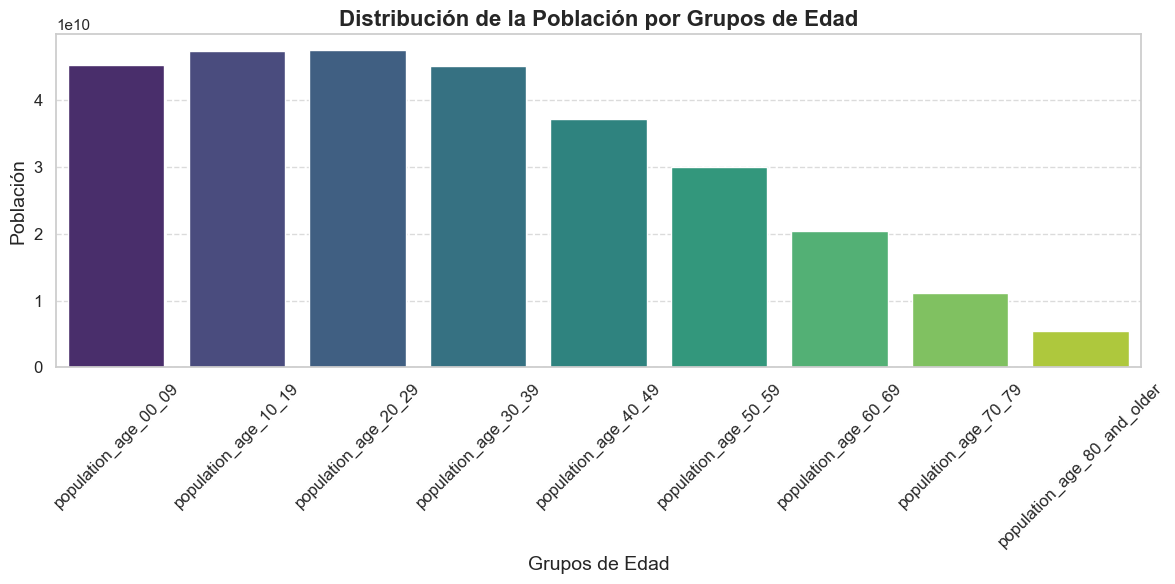

In [330]:
# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date'])  # Elimina filas donde 'date' es NaT (no es una fecha)

# Seleccionar las variables de grupos de edad
age_groups = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

# Crear un nuevo DataFrame para la visualización
age_distribution = df[age_groups].sum().reset_index()  # Sumar la población por grupo de edad
age_distribution.columns = ['Age Group', 'Population']  # Renombrar las columnas

# Crear la figura para el gráfico de barras
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Crear el gráfico de barras usando la paleta 'viridis'
sns.barplot(x='Age Group', y='Population', data=age_distribution, hue='Age Group', palette='viridis', legend=False)

# Configurar el gráfico
plt.title('Distribución de la Población por Grupos de Edad', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Grupos de Edad', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Población', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de barras muestra una pirámide poblacional típica, con una mayor concentración en los grupos de edad más jóvenes y una disminución progresiva hacia los adultos mayores, siendo el grupo de 20 a 29 años el más numeroso.

### ***Mapa de calor de métricas por país***


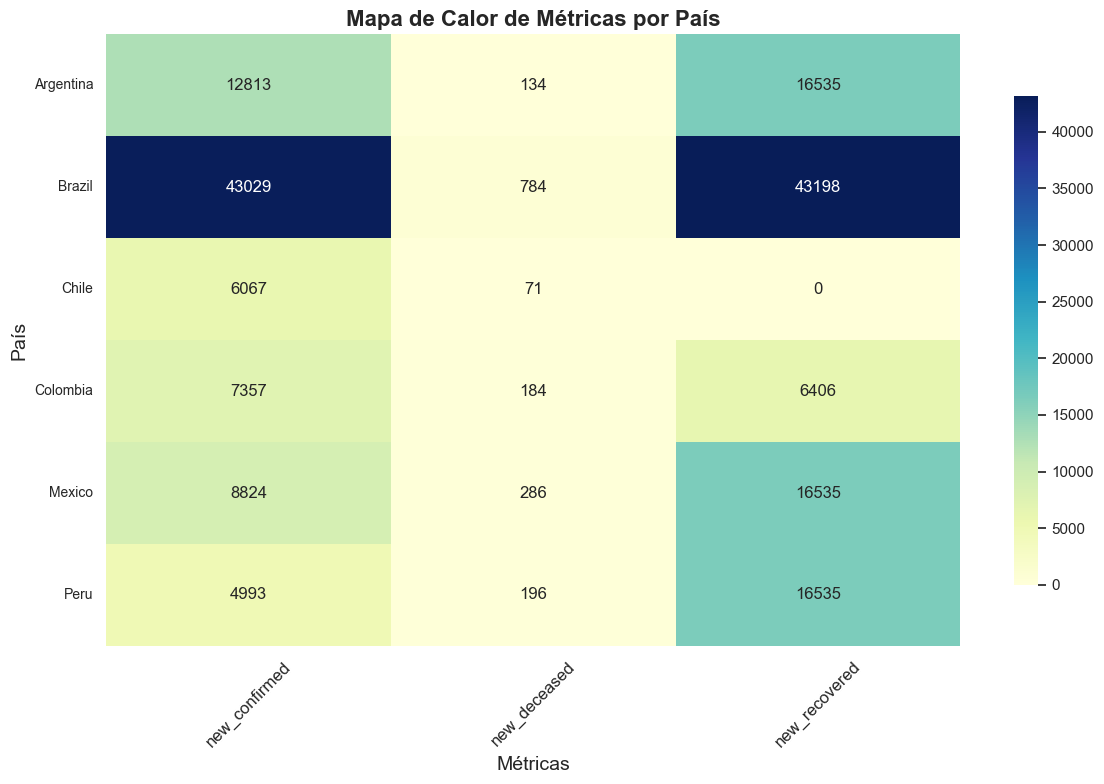

In [331]:
# Agrupar los datos por país y calcular la media de las métricas
metrics_by_country = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_recovered']].mean()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Tamaño de la figura
heatmap = sns.heatmap(metrics_by_country, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={"shrink": .8})

# Configurar el gráfico
plt.title('Mapa de Calor de Métricas por País', fontsize=16, fontweight='bold')
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('País', fontsize=14)

# Ajustar el formato del eje Y para evitar notación científica
# No es necesario ajustar el formato del eje Y si ya se están mostrando los nombres de los países
plt.yticks(rotation=0, fontsize=10)  # Mantener etiquetas del eje y horizontales

# Asegurarse de que los nombres de los países se muestren correctamente
heatmap.set_yticklabels(metrics_by_country.index, rotation=0)

plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño
plt.show()

El mapa de calor muestra las diferencias en los indicadores de COVID-19 (nuevos casos, fallecimientos y recuperaciones) entre varios países de América Latina. Cada país está representado por un rectángulo dividido en tres secciones, cada una correspondiente a un indicador. El color de cada sección indica la magnitud del valor, con colores más oscuros representando valores más altos.

### ***Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país***

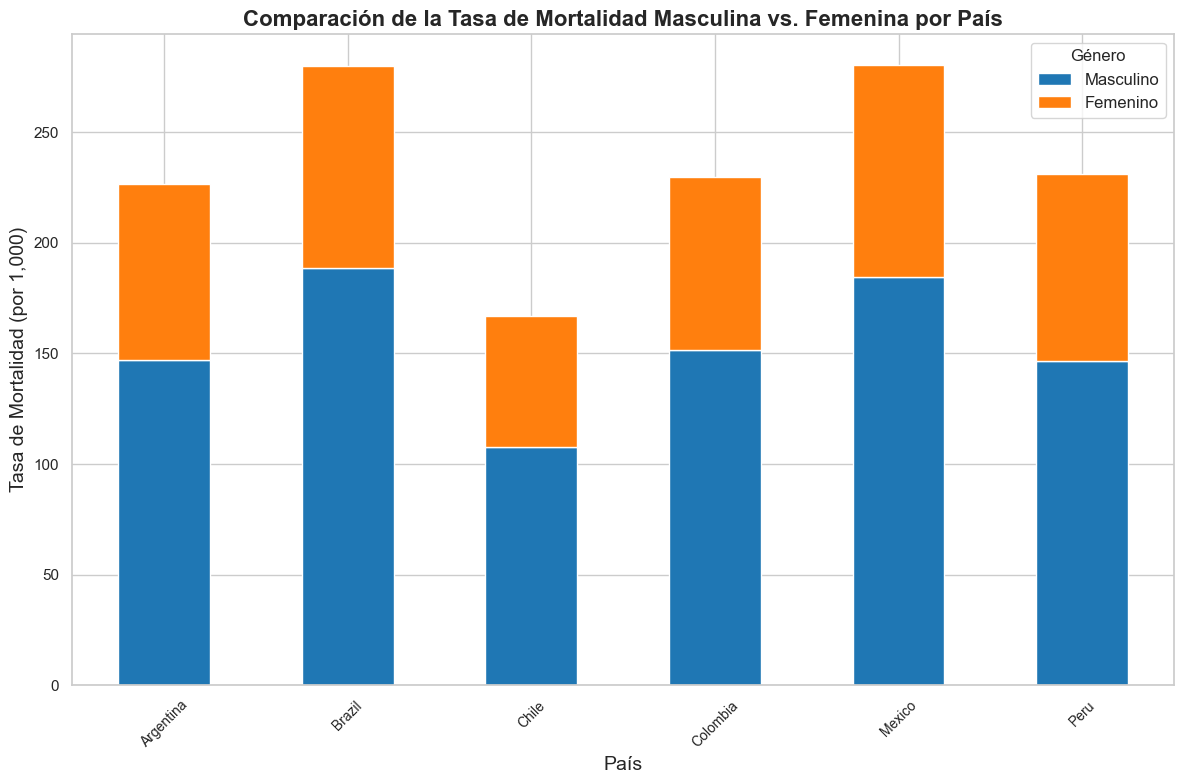

In [332]:
# Agrupar los datos por país y seleccionar las tasas de mortalidad
mortality_rates = df.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()  # Agrupa por país y calcula la media

# Crear el diagrama de barras apilado
mortality_rates.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])  # Crea el gráfico de barras apiladas

# Configurar el gráfico
plt.title('Comparación de la Tasa de Mortalidad Masculina vs. Femenina por País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Tasa de Mortalidad (por 1,000)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X
plt.legend(title='Género', labels=['Masculino', 'Femenino'], fontsize=12)  # Leyenda del gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

El gráfico muestra que la tasa de mortalidad masculina es consistentemente más alta que la femenina en todos los países analizados, con Brasil y México presentando las mayores diferencias.

### ***Matriz de correlación de indicadores demográficos y de salud***

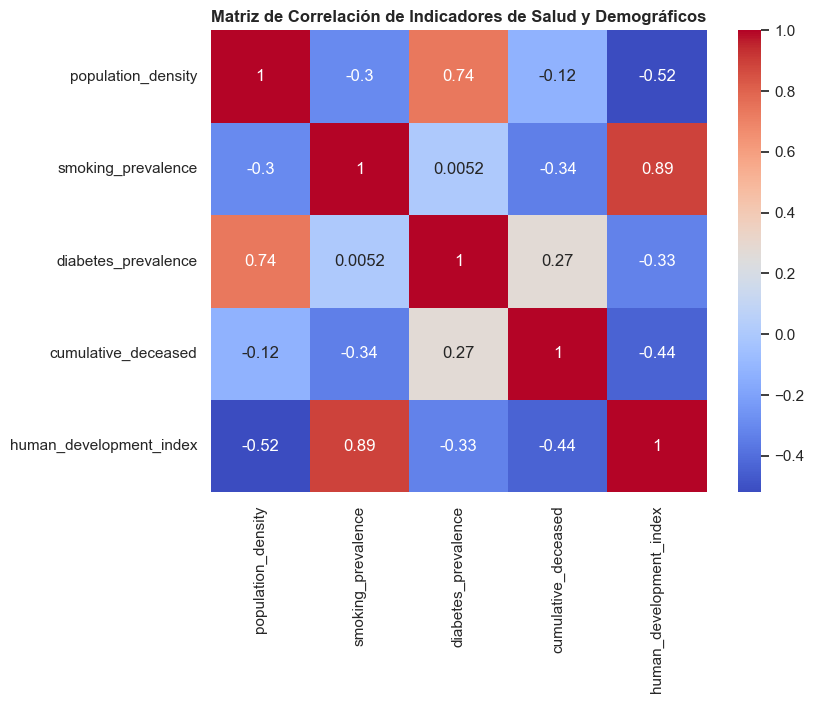

In [333]:
# Seleccionar las columnas relevantes para la matriz de correlación
columns_of_interest = [
    'population_density', 
    'smoking_prevalence', 
    'diabetes_prevalence', 
    'cumulative_deceased', 
    'human_development_index'
]  # Lista de columnas que se utilizarán para calcular la correlación

# Calcular la matriz de correlación
correlation_matrix = df[columns_of_interest].corr()  # Calcula la matriz de correlación

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Crea el mapa de calor

# Mostrar el gráfico
plt.title('Matriz de Correlación de Indicadores de Salud y Demográficos', fontweight='bold')  # Título del gráfico en negrita
plt.show()  # Muestra el gráfico

La matriz revela una fuerte relación positiva entre densidad poblacional y diabetes, y negativa entre desarrollo humano y tabaquismo. Además, muestra que la mortalidad está inversamente relacionada con el desarrollo humano.

### ***Comparación de la prevalencia de diabetes y la tasa de mortalidad***

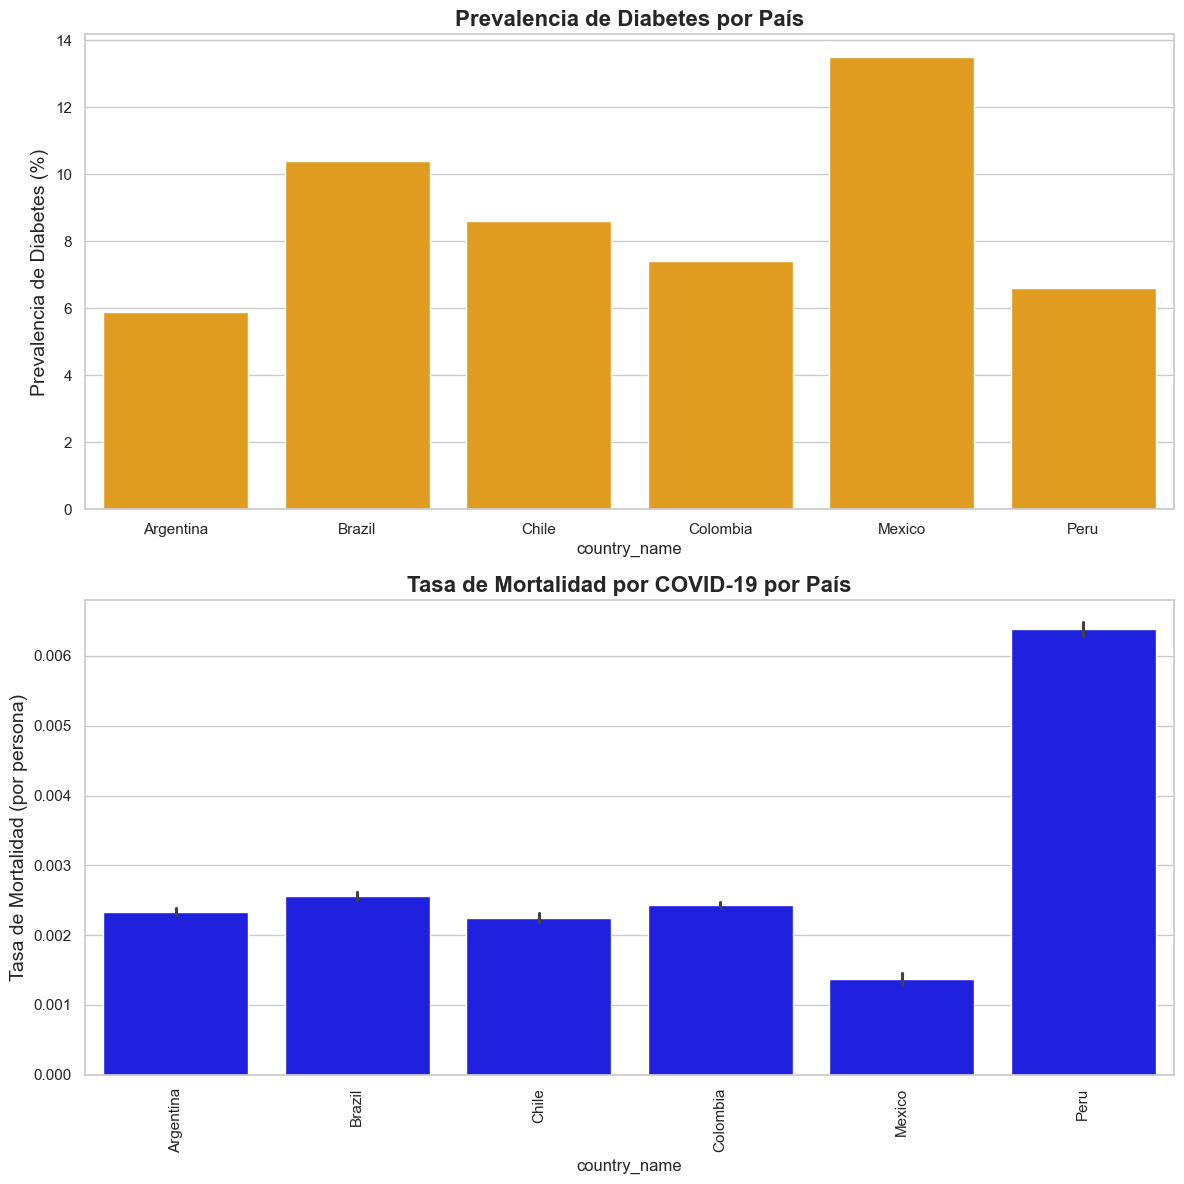

In [334]:
# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # Dos gráficos en una columna

# Gráfico de barras para la prevalencia de diabetes
sns.barplot(data=df, x='country_name', y='diabetes_prevalence', color='orange', ax=ax1)
ax1.set_title('Prevalencia de Diabetes por País', fontsize=16, fontweight='bold')  # Título del gráfico en negrita
ax1.set_ylabel('Prevalencia de Diabetes (%)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para ambos gráficos

# Gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df, x='country_name', y=df['cumulative_deceased'] / df['population'], color='blue', ax=ax2)
ax2.set_title('Tasa de Mortalidad por COVID-19 por País', fontsize=16, fontweight='bold')  # Título del gráfico en negrita
ax2.set_ylabel('Tasa de Mortalidad (por persona)', fontsize=14)  # Etiqueta del eje Y

plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar los gráficos

El gráfico muestra que México tiene la mayor prevalencia de diabetes entre los países analizados (Argentina, Brasil, Chile, Colombia y Perú), mientras que Argentina presenta la menor.
El gráfico muestra que Perú tuvo la tasa de mortalidad por COVID-19 más alta entre los países analizados (Argentina, Brasil, Chile, Colombia y México), mientras que México presentó la más baja.

### ***5. Identificación de tendencias y patrones***

In [335]:
# Extraer el mes y el año de la fecha
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Agrupar por año y mes, y calcular la media
monthly_data = df.groupby(['year', 'month']).agg({'new_confirmed': 'mean'}).reset_index()

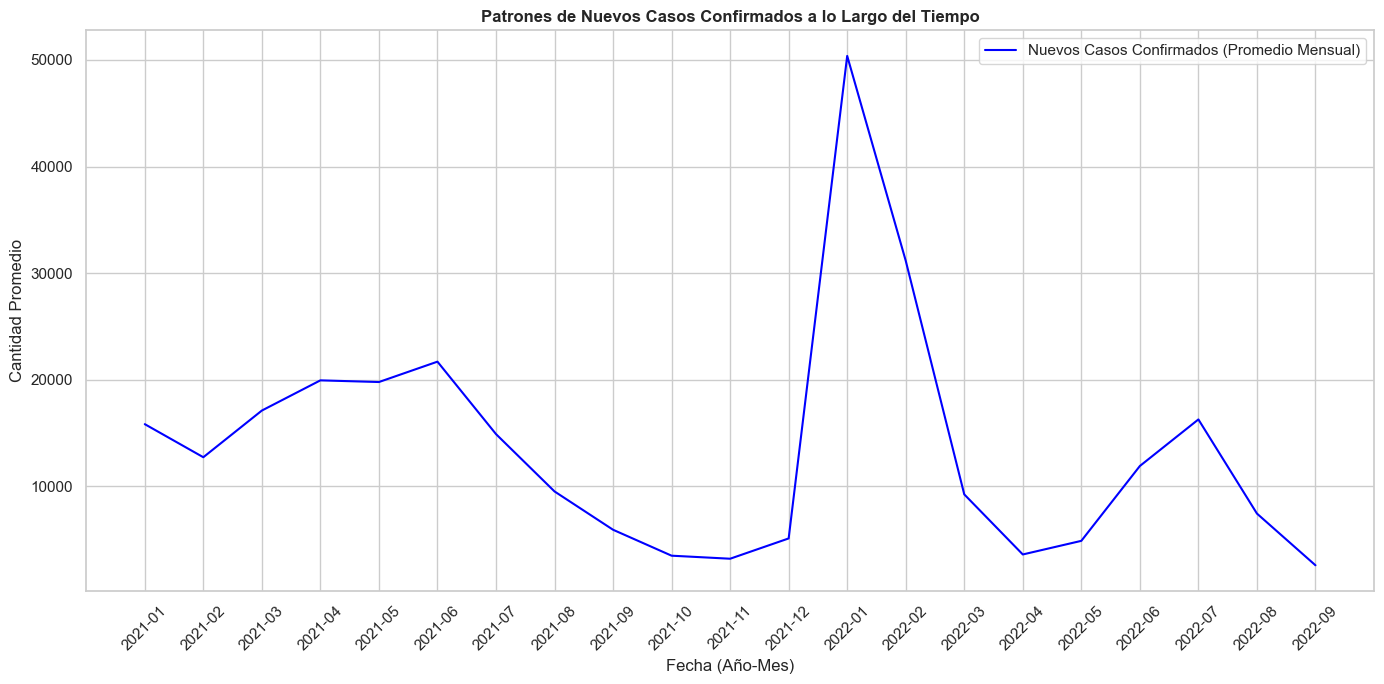

In [336]:
# Crear una nueva columna para el eje X que combine año y mes
monthly_data['year_month'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str).str.zfill(2)

# Crear una figura para el gráfico de nuevos casos confirmados
plt.figure(figsize=(14, 7))  # Establecer el tamaño de la figura

# Graficar los nuevos casos confirmados (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='new_confirmed', label='Nuevos Casos Confirmados (Promedio Mensual)', color='blue')

# Configuración del gráfico
plt.title('Patrones de Nuevos Casos Confirmados a lo Largo del Tiempo', fontweight='bold')  # Título en negrita
plt.xlabel('Fecha (Año-Mes)')  # Etiqueta del eje X
plt.ylabel('Cantidad Promedio')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.legend()  # Mostrar la leyenda

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico

El gráfico muestra una tendencia de nuevos casos de COVID-19 con picos y valles a lo largo del tiempo, indicando una variabilidad en la propagación del virus, aunque con una tendencia general a la baja.

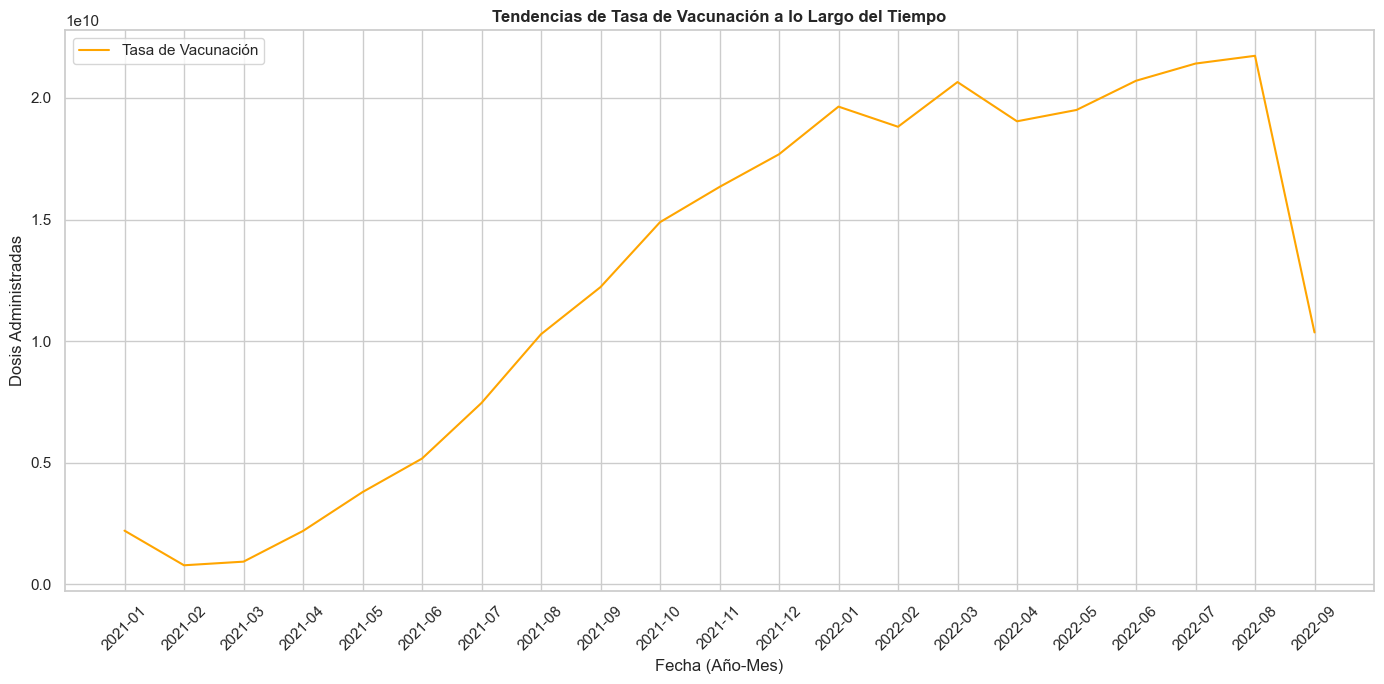

In [337]:
# Asegúrate de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la fecha
df['year_month'] = df['date'].dt.to_period('M')  # Crear una columna de año-mes

# Agrupar por año y mes, y sumar las dosis administradas
monthly_vaccine_data = df.groupby('year_month').agg({'cumulative_vaccine_doses_administered': 'sum'}).reset_index()

# Convertir la columna de periodo a string para el eje X
monthly_vaccine_data['year_month'] = monthly_vaccine_data['year_month'].astype(str)

# Crear una figura para el gráfico de la tasa de vacunación
plt.figure(figsize=(14, 7))  # Establecer el tamaño de la figura

# Graficar la tasa de vacunación (dosis administradas a lo largo del tiempo)
sns.lineplot(data=monthly_vaccine_data, x='year_month', y='cumulative_vaccine_doses_administered', label='Tasa de Vacunación', color='orange')

# Configuración del gráfico
plt.title('Tendencias de Tasa de Vacunación a lo Largo del Tiempo', fontweight='bold')  # Título en negrita
plt.xlabel('Fecha (Año-Mes)')  # Etiqueta del eje X
plt.ylabel('Dosis Administradas')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.legend()  # Mostrar la leyenda

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico

El gráfico muestra un aumento gradual en el número de dosis de vacunas administradas desde principios de 2021 hasta alcanzar un pico a mediados de 2022, seguido de una disminución significativa hasta finales del mismo año.

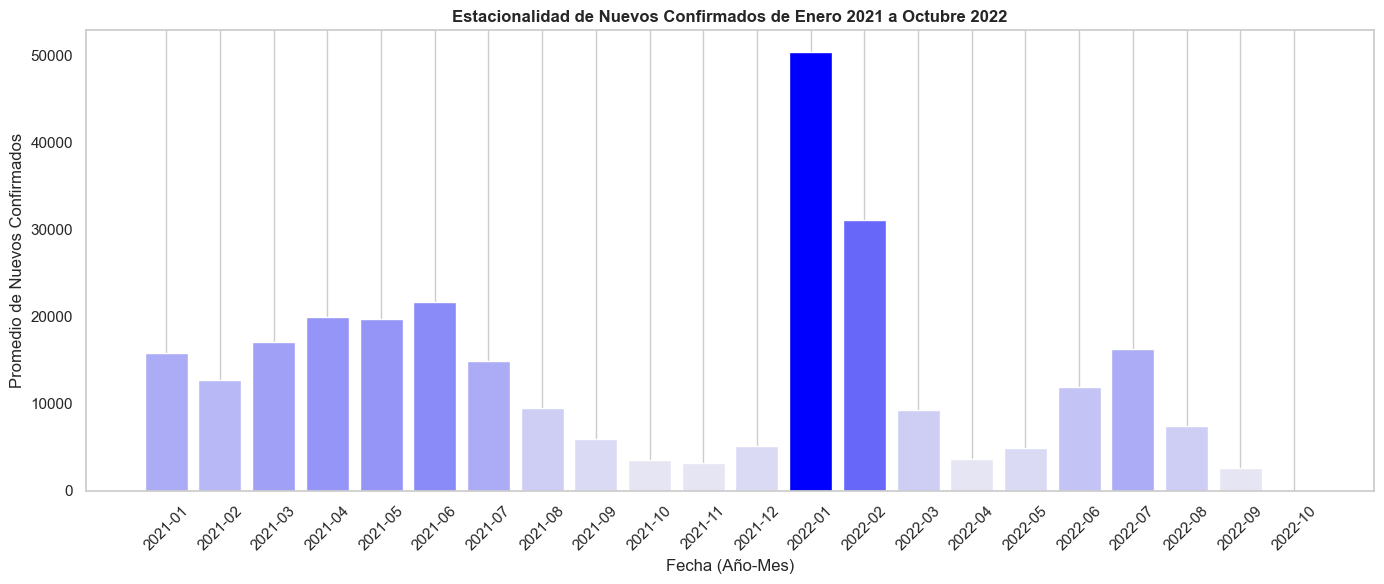

In [338]:
# Crear un rango de fechas desde enero 2021 hasta octubre 2022
date_range = pd.date_range(start='2021-01-01', end='2022-10-31', freq='ME')  # Cambiado 'M' a 'ME'

# Crear un DataFrame con todos los meses
all_months = pd.DataFrame({'date': date_range})
all_months['year_month'] = all_months['date'].dt.to_period('M')  # Crear una columna de año-mes

# Extraer el mes y el año de la fecha original
df['year_month'] = df['date'].dt.to_period('M')

# Agrupar por año y mes y calcular la media de nuevos confirmados
estacionalidad = df.groupby('year_month')['new_confirmed'].mean().reset_index()

# Unir los datos de estacionalidad con todos los meses
estacionalidad = all_months.merge(estacionalidad, on='year_month', how='left')

# Rellenar los valores NaN con 0 (o puedes usar otro método de imputación)
estacionalidad['new_confirmed'] = estacionalidad['new_confirmed'].fillna(0)

# Convertir la columna de periodo a string para el eje X
estacionalidad['year_month'] = estacionalidad['year_month'].astype(str)

# Normalizar los valores de 'new_confirmed' para el mapeo de colores
norm = (estacionalidad['new_confirmed'] - estacionalidad['new_confirmed'].min()) / (estacionalidad['new_confirmed'].max() - estacionalidad['new_confirmed'].min())

# Crear una figura para el gráfico de estacionalidad
plt.figure(figsize=(14, 6))  # Establecer el tamaño de la figura

# Crear una paleta de colores en tonalidades de azul
blue_palette = sns.light_palette("blue", as_cmap=False, n_colors=len(estacionalidad))

# Asignar colores basados en la normalización
colors = [blue_palette[int(n * (len(blue_palette) - 1))] for n in norm]

# Graficar la estacionalidad de nuevos confirmados usando matplotlib
plt.bar(estacionalidad['year_month'], estacionalidad['new_confirmed'], color=colors)

# Configuración del gráfico
plt.title('Estacionalidad de Nuevos Confirmados de Enero 2021 a Octubre 2022', fontweight='bold')  # Título en negrita
plt.xlabel('Fecha (Año-Mes)')  # Etiqueta del eje X
plt.ylabel('Promedio de Nuevos Confirmados')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(axis='y')  # Añadir una cuadrícula en el eje Y

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico

El gráfico muestra un patrón estacional en los nuevos casos confirmados entre enero de 2021 y octubre de 2022. Se observa un pico muy pronunciado a finales de 2021 e inicios de 2022, indicando un aumento significativo en los casos durante ese período. 

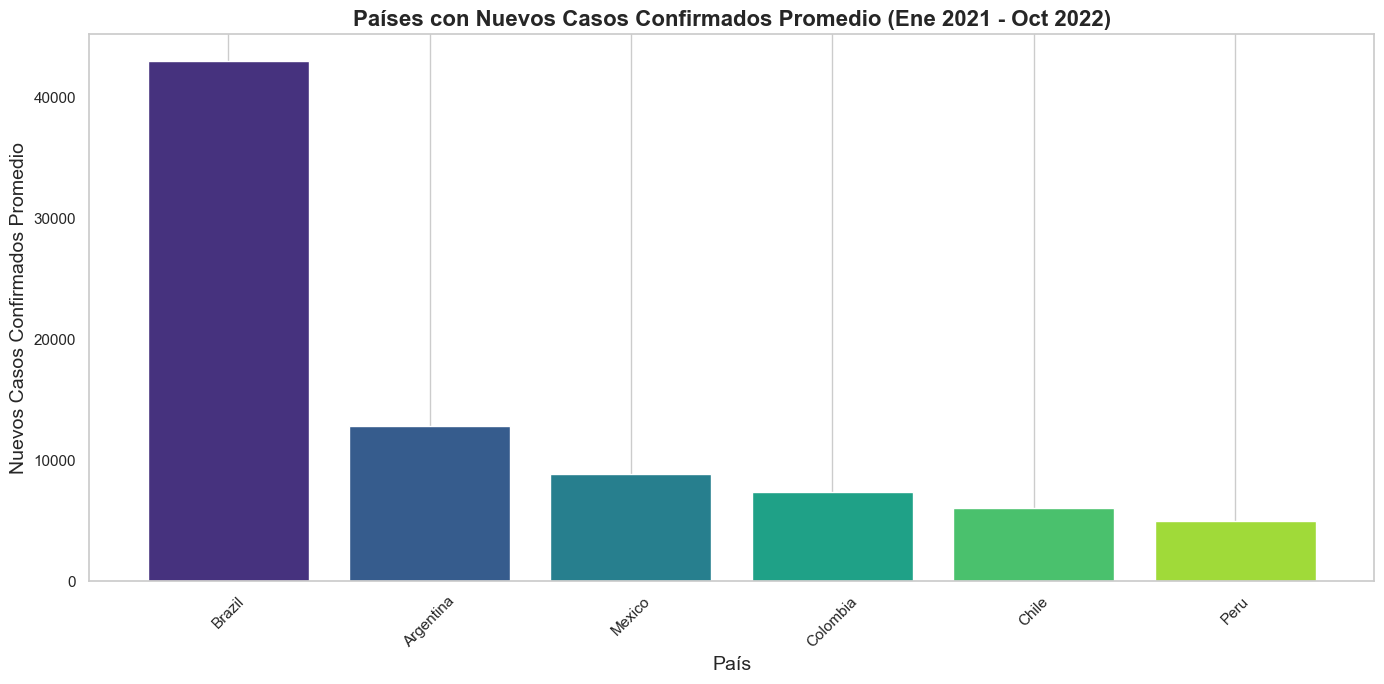

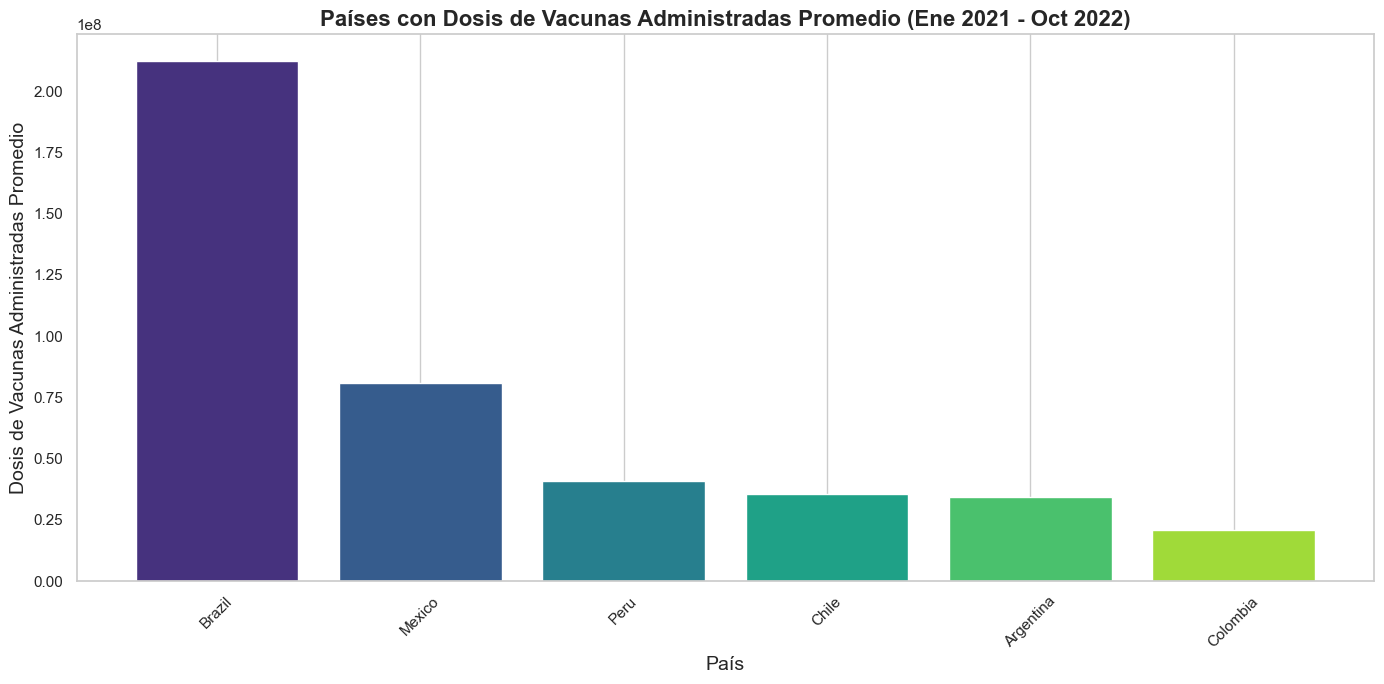

In [339]:
# Filtrar los datos para el rango de fechas deseado (enero 2021 a octubre 2022)
df_filtered = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-10-31')]

# Agrupar por país y calcular la media de nuevos casos y dosis de vacunas administradas
df_grouped = df_filtered.groupby('country_name').agg({
'new_confirmed': 'mean',
'cumulative_vaccine_doses_administered': 'mean'
}).reset_index()

# Crear un gráfico de barras para nuevos casos confirmados
plt.figure(figsize=(14, 7))
top_new_cases = df_grouped.sort_values('new_confirmed', ascending=False).head(10)
colors_new_cases = sns.color_palette("viridis", len(top_new_cases))

# Usar plt.bar para evitar la advertencia
plt.bar(top_new_cases['country_name'], top_new_cases['new_confirmed'], color=colors_new_cases)
plt.title('Países con Nuevos Casos Confirmados Promedio (Ene 2021 - Oct 2022)', fontsize=16, fontweight='bold')  # Título en negrita
plt.xlabel('País', fontsize=14)
plt.ylabel('Nuevos Casos Confirmados Promedio', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Crear un gráfico de barras para dosis de vacunas administradas
plt.figure(figsize=(14, 7))
top_vaccine_doses = df_grouped.sort_values('cumulative_vaccine_doses_administered', ascending=False).head(10)
colors_vaccine_doses = sns.color_palette("viridis", len(top_vaccine_doses))

# Usar plt.bar para evitar la advertencia
plt.bar(top_vaccine_doses['country_name'], top_vaccine_doses['cumulative_vaccine_doses_administered'], color=colors_vaccine_doses)
plt.title('Países con Dosis de Vacunas Administradas Promedio (Ene 2021 - Oct 2022)', fontsize=16, fontweight='bold')  # Título en negrita
plt.xlabel('País', fontsize=14)
plt.ylabel('Dosis de Vacunas Administradas Promedio', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

El gráfico muestra que Brasil tuvo el promedio más alto de nuevos casos confirmados de COVID-19 entre enero de 2021 y octubre de 2022, seguido por Argentina, México, Colombia, Chile y Perú. 
El gráfico muestra que Brasil lideró en el promedio de dosis de vacunas administradas entre enero de 2021 y octubre de 2022, seguido por México, Perú, Chile, Argentina y Colombia.

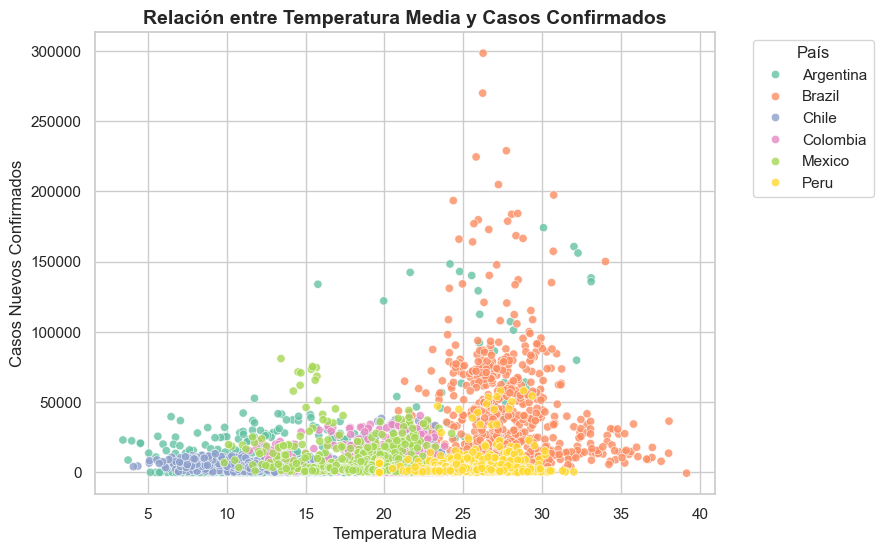

In [340]:
# Gráfico de dispersión entre temperatura y casos confirmados
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura del gráfico
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='Set2', alpha=0.8)  # Crea un gráfico de dispersión con los datos especificados
plt.title('Relación entre Temperatura Media y Casos Confirmados', fontsize=14, fontweight='bold')  # Establece el título del gráfico
plt.xlabel('Temperatura Media')  # Etiqueta del eje X
plt.ylabel('Casos Nuevos Confirmados')  # Etiqueta del eje Y
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Añade una leyenda para identificar los países
plt.show()  # Muestra el gráfico

El gráfico muestra una relación dispersa entre la temperatura media y los nuevos casos confirmados de COVID-19 en varios países latinoamericanos, sin una correlación clara entre ambas variables.

### ***Avance 3***

### ***Importa las librerías que necesites utilizar en este avance***

In [341]:
# Importar la biblioteca pandas para la manipulación y análisis de datos
import pandas as pd

# Importar la biblioteca numpy para operaciones numéricas y manejo de arreglos
import numpy as np

# Importar matplotlib.pyplot para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

# Importar seaborn para visualizaciones estadísticas más atractivas y fáciles de interpretar
import seaborn as sns

# Importar seasonal_decompose de statsmodels para descomponer series temporales en componentes
from statsmodels.tsa.seasonal import seasonal_decompose

# Importar plot_acf y plot_pacf de statsmodels para graficar la función de autocorrelación y la función de autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ***Realiza un análisis exploratorio centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos***

### ***Evolución de Casos Activos vs. Recuperados***

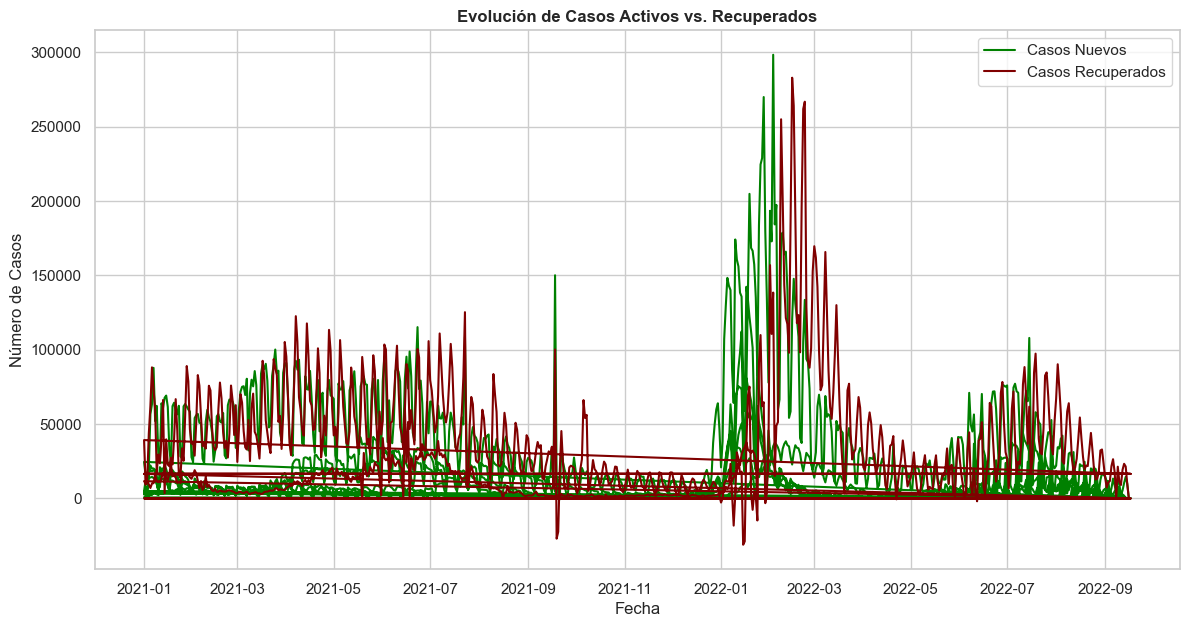

In [342]:
# Visualizar la evolución de casos activos y recuperados
# Crear una figura con un tamaño específico
plt.figure(figsize=(14, 7))

# Graficar la serie de casos nuevos con la fecha en el eje x
plt.plot(df['date'], df['new_confirmed'], label='Casos Nuevos', color='green')

# Graficar la serie de casos recuperados con la fecha en el eje x
plt.plot(df['date'], df['new_recovered'], label='Casos Recuperados', color='maroon')

# Etiquetar el eje x
plt.xlabel('Fecha')

# Etiquetar el eje y
plt.ylabel('Número de Casos')

# Establecer el título del gráfico y ponerlo en negrita
plt.title('Evolución de Casos Activos vs. Recuperados', fontweight='bold')

# Mostrar la leyenda para identificar las series graficadas
plt.legend()

# Mostrar el gráfico
plt.show()

El gráfico muestra una fluctuación constante en el número de casos nuevos y recuperados a lo largo del tiempo, con picos y valles que sugieren olas sucesivas de la enfermedad. 

### ***Relación entre la Cobertura de Vacunación y la Reducción de Casos***

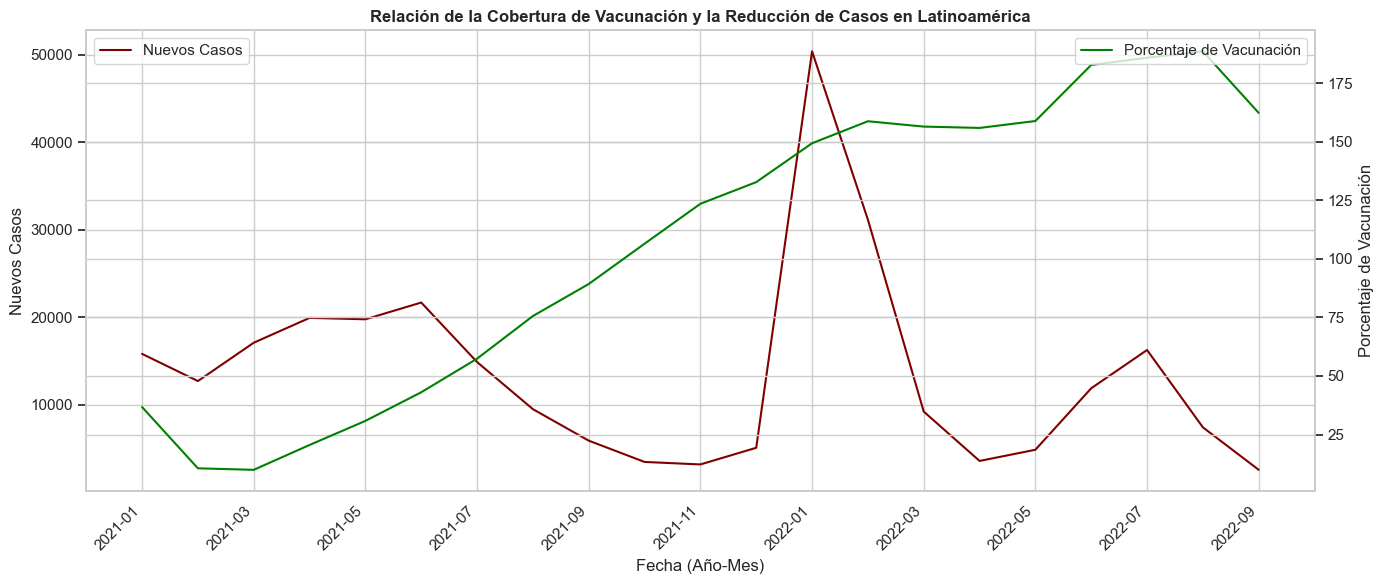

In [343]:
# Creamos los porcentajes de vacunación
df['percentage_vaccinated'] = df['cumulative_vaccine_doses_administered'] / df['population'] * 100

# Agrupar por mes y calcular la media
monthly_data = df.groupby(df['date'].dt.to_period('M')).mean(numeric_only=True).reset_index()

# Crear una nueva columna para el eje X que combine año y mes
monthly_data['year_month'] = monthly_data['date'].dt.strftime('%Y-%m')

# Crear una figura para el gráfico
plt.figure(figsize=(14, 6))  # Aumentar el tamaño de la figura
ax1 = plt.gca()  # Obtener el eje actual
ax2 = ax1.twinx()  # Crear un segundo eje y

# Graficar los nuevos casos confirmados (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='new_confirmed', ax=ax1, color='maroon', label='Nuevos Casos')

# Graficar el porcentaje de vacunación (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='percentage_vaccinated', ax=ax2, color='green', label='Porcentaje de Vacunación')

# Configuración del gráfico
ax1.set_xlabel('Fecha (Año-Mes)')
ax1.set_ylabel('Nuevos Casos')
ax2.set_ylabel('Porcentaje de Vacunación')
ax1.set_title('Relación de la Cobertura de Vacunación y la Reducción de Casos en Latinoamérica', fontweight='bold')  # Título en negrita

# Ajustar las etiquetas del eje X para evitar superposición
ax1.set_xticks(monthly_data['year_month'][::2])  # Mostrar cada segunda etiqueta
ax1.set_xticklabels(monthly_data['year_month'][::2], rotation=45, ha='right')  # Rotar y alinear a la derecha

# Leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()

El gráfico muestra una relación entre la cobertura de vacunación y la reducción de casos de COVID-19 en Latinoamérica. Se observa que a medida que aumenta el porcentaje de vacunación, hay una tendencia general a la disminución de los nuevos casos. 

### ***Progreso de la vacunación por país***

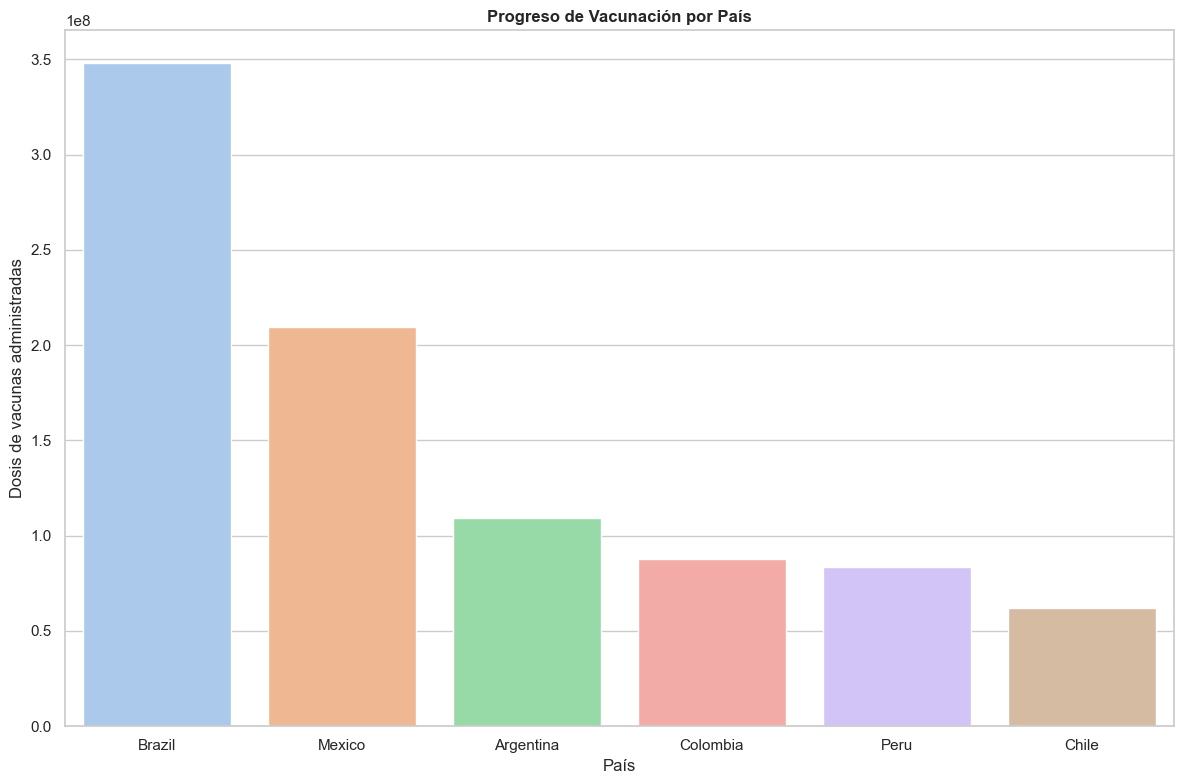

In [344]:
# Agrupar y ordenar los datos
data_vacunacion = df.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Crear la figura
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Estilo más limpio

# Graficar las barras verticales con un mapa de colores
bar_plot = sns.barplot(x=data_vacunacion.index, y=data_vacunacion.values, hue=data_vacunacion.index, palette='pastel', legend=False)

# Configuración del gráfico
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X en posición horizontal
plt.xlabel('País')
plt.ylabel('Dosis de vacunas administradas')
plt.title('Progreso de Vacunación por País', fontweight='bold')  # Título en negrita

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()

El gráfico refleja las diferencias en el progreso de la vacunación contra COVID-19 en varios países de Latinoamérica, con Brasil a la cabeza y Chile con el menor número de dosis administradas.

### ***Nuevos casos y temperatura promedio***

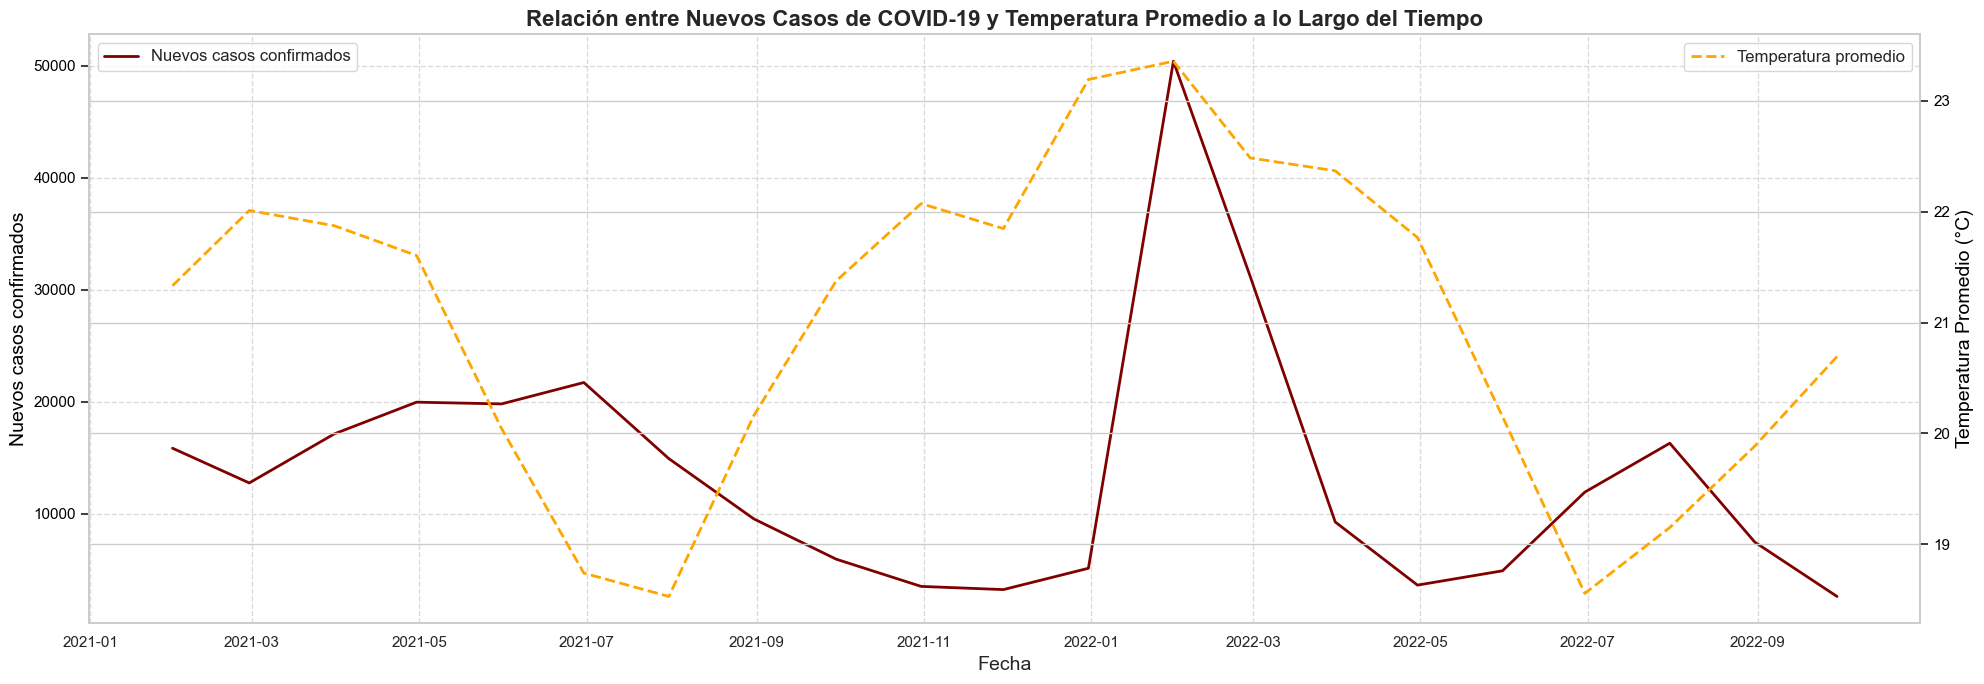

In [345]:
# Resample y calcular la media mensual usando 'ME'
year_month = df.resample('ME', on='date').mean(numeric_only=True).reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(20, 7))
ax1 = plt.gca()  # Eje para nuevos casos
ax2 = ax1.twinx()  # Eje para temperatura

# Graficar nuevos casos confirmados
ax1.plot(year_month['date'], year_month['new_confirmed'], color='maroon', label='Nuevos casos confirmados', linewidth=2)
ax1.set_ylabel('Nuevos casos confirmados', color='black', fontsize=14)  # Cambiado a negro
ax1.tick_params(axis='y', labelcolor='black')  # Cambiado a negro

# Graficar temperatura promedio con línea discontinua
ax2.plot(year_month['date'], year_month['average_temperature_celsius'], color='orange', label='Temperatura promedio', linewidth=2, linestyle='--')
ax2.set_ylabel('Temperatura Promedio (°C)', color='black', fontsize=14)  # Cambiado a negro
ax2.tick_params(axis='y', labelcolor='black')  # Cambiado a negro

# Configurar el eje x
ax1.set_xlabel('Fecha', fontsize=14)
plt.title('Relación entre Nuevos Casos de COVID-19 y Temperatura Promedio a lo Largo del Tiempo', fontsize=16, fontweight='bold')  # Título en negrita
ax1.grid(True, linestyle='--', alpha=0.7)

# Leyendas
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Formato de fechas en el eje x
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))  # Formato de año-mes
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

El gráfico no muestra una correlación directa entre la temperatura y el número de casos de COVID-19. A pesar de que en algún momento coincidieron el pico de temperatura y el pico de casos, esta relación no se mantiene a lo largo del tiempo, sugiriendo que otros factores tuvieron un impacto más significativo en la propagación de la enfermedad.

### ***Impacto de la Urbanización en la Propagación del Covid-19***

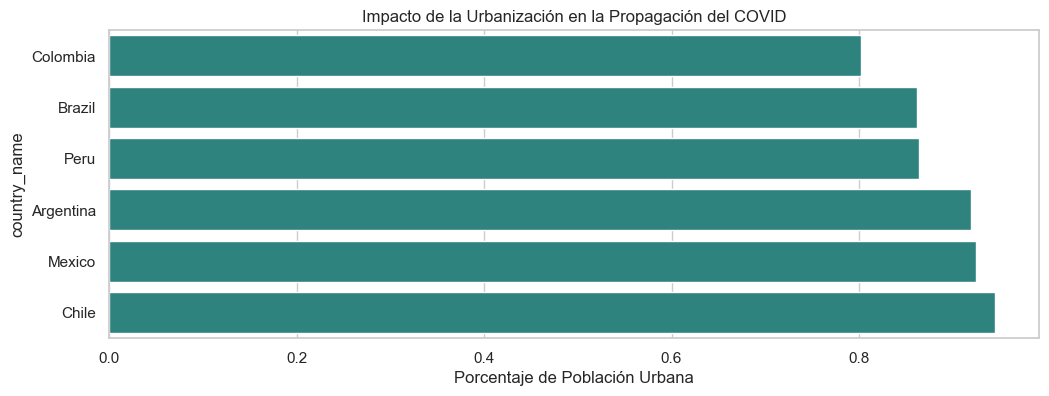

In [346]:
# Calcular el porcentaje de población urbana
df['urban_population_percentage'] = df['population_urban'] / df['population']

# Agrupar y ordenar
casos_urbanos = df.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Crear la figura
plt.figure(figsize=(12, 4))

# Usar un hue constante para evitar la advertencia
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, hue=[1]*len(casos_urbanos), palette='viridis', legend=False)

plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID')
plt.show()

El gráfico muestra que Chile presenta el mayor porcentaje de población urbana entre los países latinoamericanos analizados (Colombia, Brasil, Perú, Argentina y México), seguido de México y Argentina. Esto sugiere que la urbanización podría ser un factor a considerar al estudiar la propagación del COVID-19 en estos países.

### ***Evolución Semanal de Casos Nuevos***

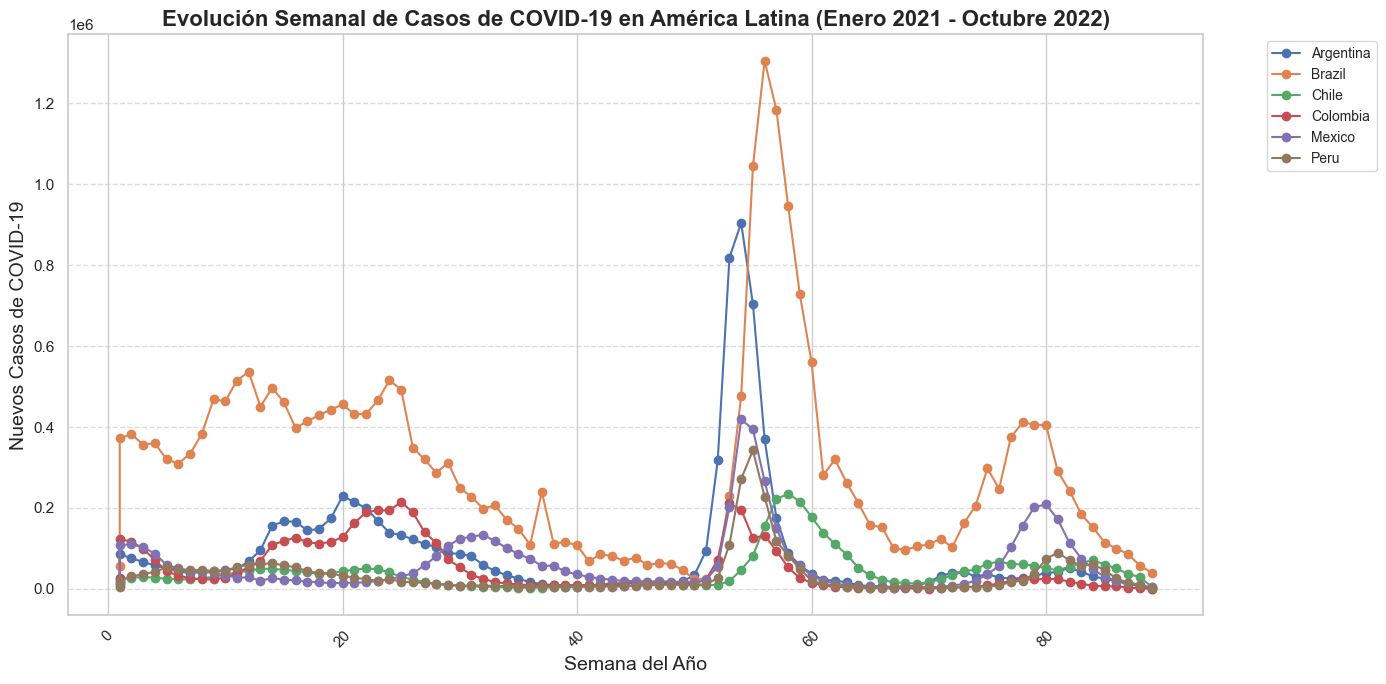

In [347]:
# Crear columnas para la semana del año y el año
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.isocalendar().year

# Agrupar los casos semanales
casos_semanales = df.groupby(['country_name', 'year', 'week'])['new_confirmed'].sum().reset_index()

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los casos semanales para cada país
for country in casos_semanales['country_name'].unique():
    country_casos_semanales = casos_semanales[casos_semanales['country_name'] == country]
    plt.plot(
        country_casos_semanales['week'] + (country_casos_semanales['year'] - 2021) * 52,  # Ajustar el eje x para que abarque todas las semanas
        country_casos_semanales['new_confirmed'],
        label=country,
        marker='o'  # Agregar marcadores para cada punto
    )

# Configurar etiquetas y título
plt.xlabel('Semana del Año', fontsize=14)
plt.ylabel('Nuevos Casos de COVID-19', fontsize=14)
plt.title('Evolución Semanal de Casos de COVID-19 en América Latina (Enero 2021 - Octubre 2022)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

El gráfico muestra una fluctuación significativa en el número de nuevos casos de COVID-19 por semana en los países de América Latina (Argentina, Brasil, Chile, Colombia, México y Perú) durante el período de enero de 2021 a octubre de 2022, con picos epidémicos que varían en tiempo e intensidad entre los diferentes países.

### ***Evolución Anual de Casos Nuevos***

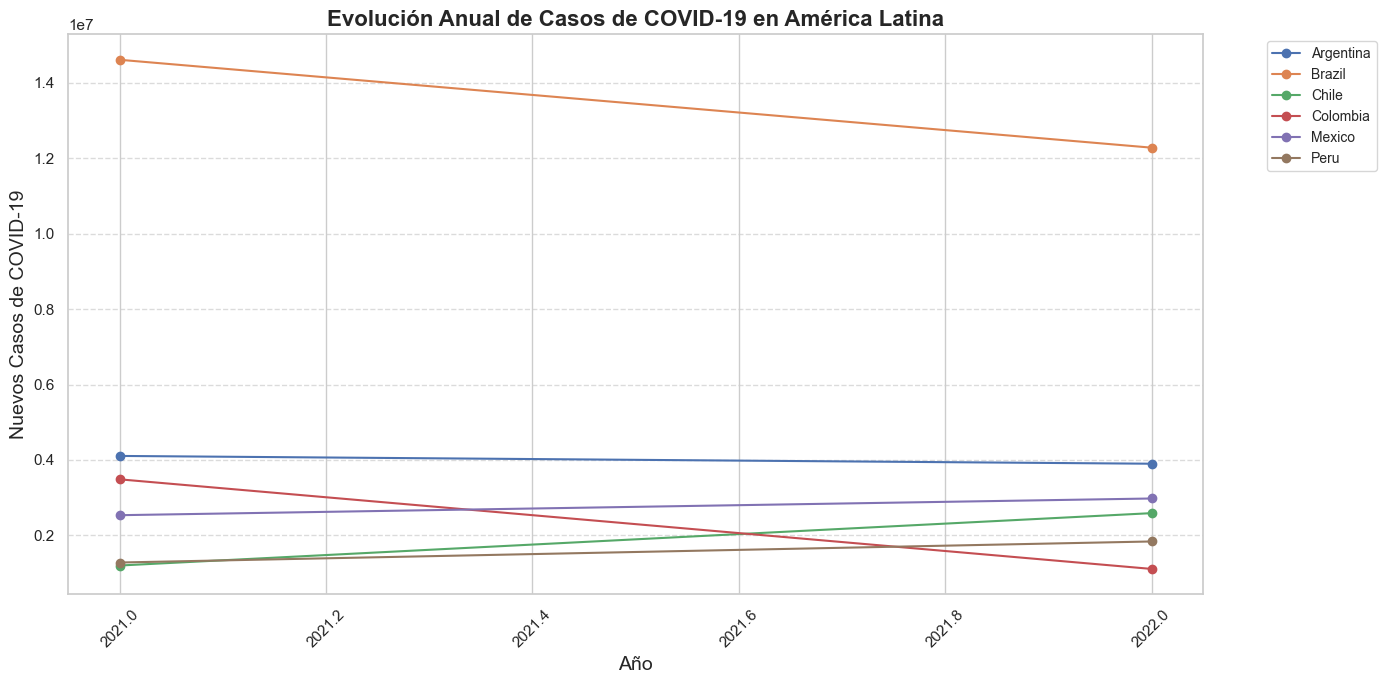

In [348]:
# Crear columna de año
df['year'] = df['date'].dt.year

# Agrupar los casos anuales
casos_anuales = df.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los casos anuales para cada país
for country in casos_anuales['country_name'].unique():
    country_casos_anuales = casos_anuales[casos_anuales['country_name'] == country]
    plt.plot(
        country_casos_anuales['year'],  # Eje x ahora es por año
        country_casos_anuales['new_confirmed'],
        label=country,
        marker='o'  # Agregar marcadores para cada punto
    )

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Nuevos Casos de COVID-19', fontsize=14)
plt.title('Evolución Anual de Casos de COVID-19 en América Latina', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()



El gráfico muestra una disminución general en los nuevos casos de COVID-19 en América Latina (Argentina, Brasil, Chile, Colombia, México y Perú) entre los años 2021 y 2022, aunque con variaciones entre países.

### ***Distribución de la Población por Grupo de Edad en los Principales Países de América Latina***

<Figure size 1600x1000 with 0 Axes>

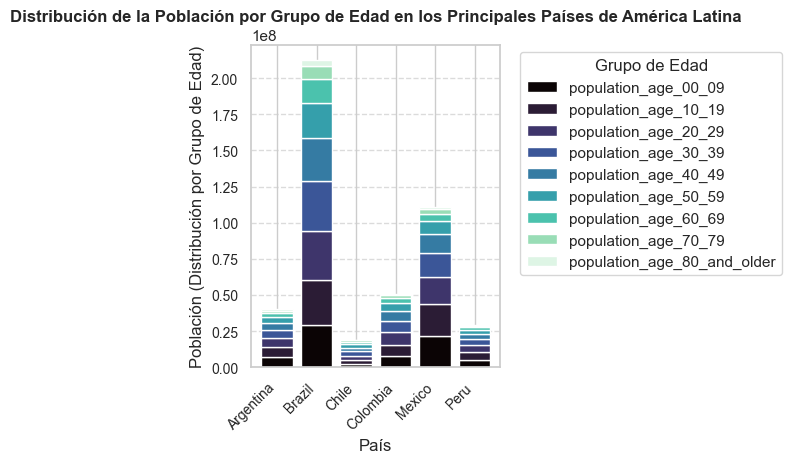

In [349]:
#Filtrar columnas de edad y agrupar los datos
age_columns = [col for col in df.columns if col.startswith('population_age')]
if age_columns:
    # Tomar los últimos datos disponibles por país
    latest_data = df.groupby('country_name').last().reset_index()

#Crear un subconjunto de los datos con las columnas relevantes para la edad
    age_data = latest_data[['country_name'] + age_columns].set_index('country_name')

#Crear la figura con un tamaño ampliado
    plt.figure(figsize=(16, 10))

#Graficar la distribución de edad en los seis primeros países de la lista
    age_data.head(6).plot(kind='bar', stacked=True, colormap='mako', width=0.8)

#Ajustes de diseño
    plt.title('Distribución de la Población por Grupo de Edad en los Principales Países de América Latina', fontweight='bold')
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Población (Distribución por Grupo de Edad)', fontsize=12)

#Configuración de la leyenda
    plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')

#Ajustar el diseño y mejorar la legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y para facilitar la lectura

#Ajuste del layout para evitar superposiciones
    plt.tight_layout()
    plt.show()

El gráfico muestra que la distribución por grupos de edad en los principales países de América Latina (Argentina, Brasil, Chile, Colombia, México y Perú) es similar, con una mayor concentración de población en los grupos de edad entre 20 y 59 años, y una menor proporción en los grupos de edad más jóvenes y mayores.

### ***Comparación de Estrategias de Vacunación en América Latina***

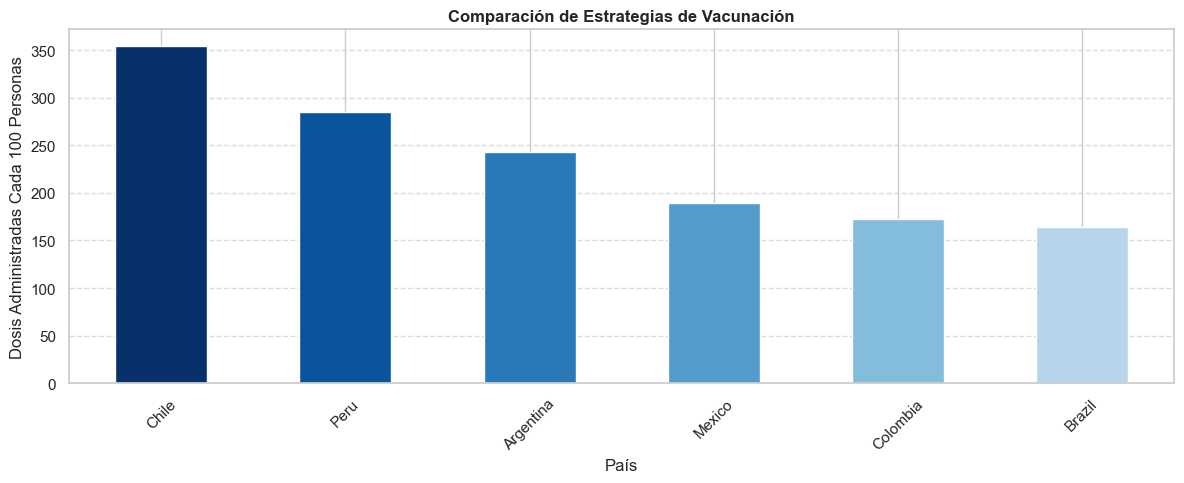

In [350]:
# Calcular la estrategia de vacunación
estrategia_vacunacion = (
    df.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /
    df.groupby('country_name')['population'].mean() * 100
)

# Ordenar los resultados
estrategia_vacunacion = estrategia_vacunacion.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 5))

# Crear un degradado de color azul invertido
colors = plt.cm.Blues(np.linspace(1, 0.3, len(estrategia_vacunacion)))  # Invertir el rango

# Graficar con el degradado
estrategia_vacunacion.plot(kind='bar', color=colors)

# Configurar etiquetas y título
plt.xlabel('País')
plt.ylabel('Dosis Administradas Cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación', fontweight='bold')  # Título en negrita
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

El gráfico muestra que Chile lidera en la cantidad de dosis de vacunas administradas por cada 100 personas entre los países de América Latina presentados (Chile, Perú, Argentina, México, Colombia y Brasil), seguido por Perú y Argentina.

### ***Evolución del Número de Muertes Diarias***

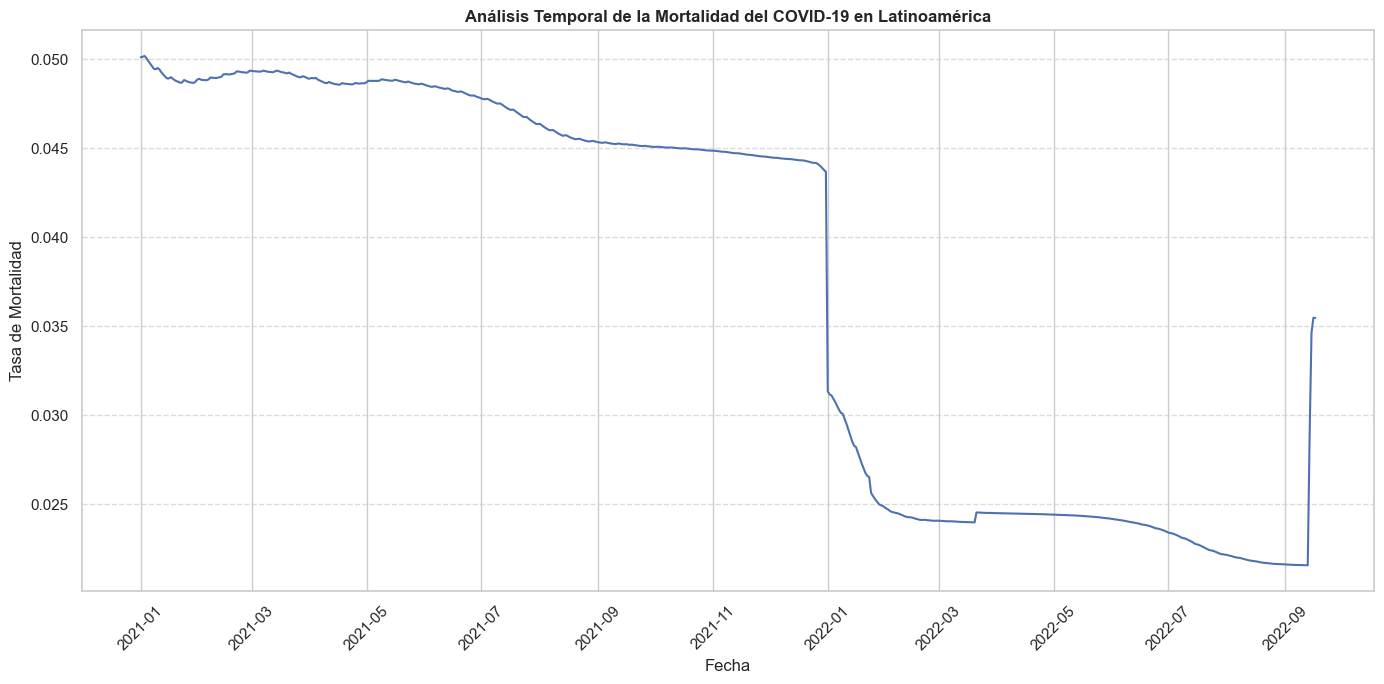

In [351]:
# Calcular la tasa de mortalidad
df['mortality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed']

# Asegurarse de que la columna 'date' esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Crear el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='mortality_rate', estimator='mean', errorbar=None)

# Configurar el título y las etiquetas
plt.title('Análisis Temporal de la Mortalidad del COVID-19 en Latinoamérica', fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

La gráfica muestra una clara disminución en la tasa de mortalidad por COVID-19 en Latinoamérica a lo largo del período analizado, que abarca desde principios de 2021 hasta finales de 2022. 

### ***Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad***

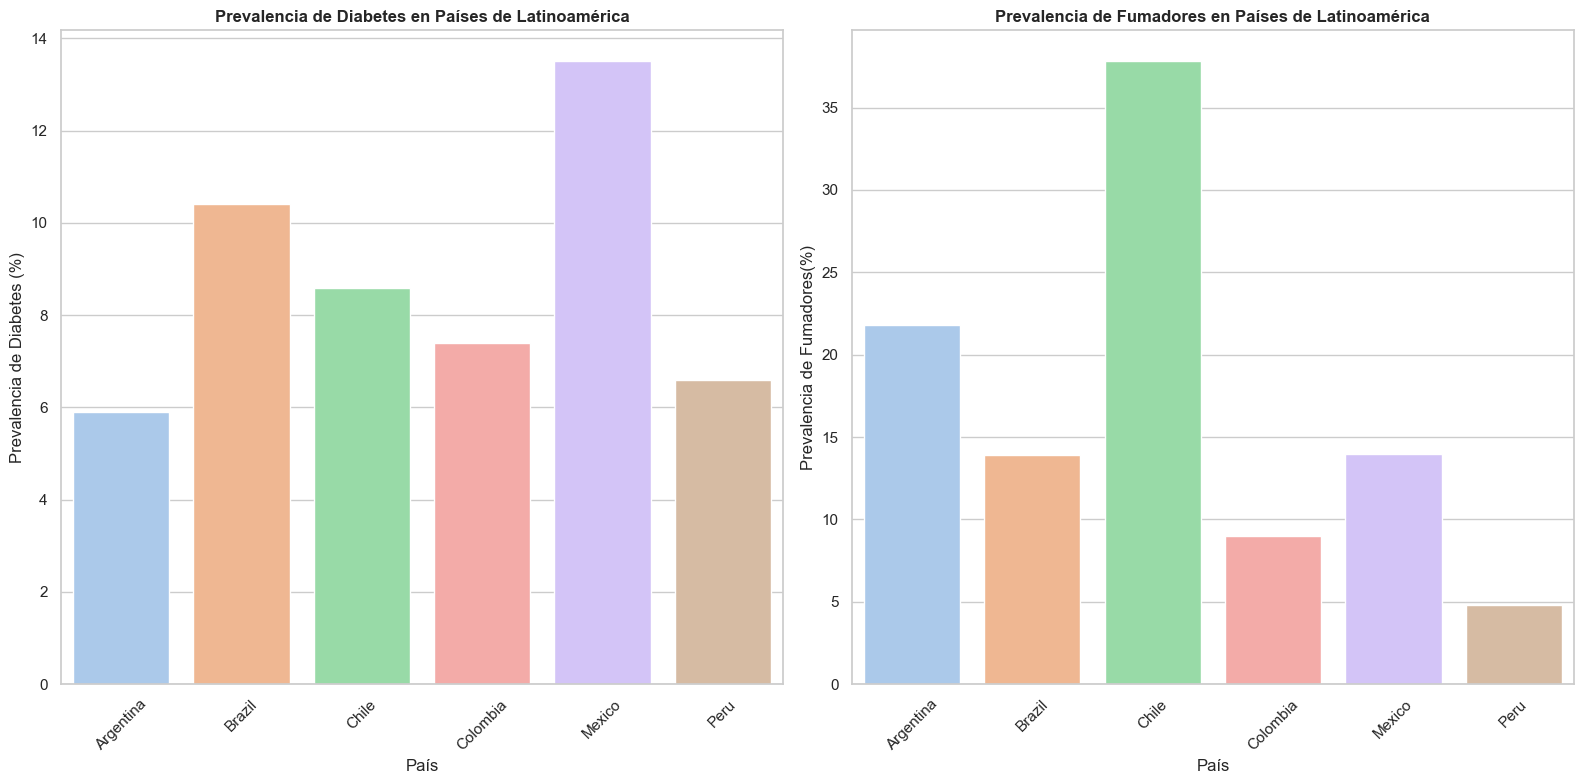

In [352]:
# Filtrar los datos para incluir todos los países
conditions_data = df[['country_name', 'diabetes_prevalence', 'smoking_prevalence']].dropna()

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de prevalencia de diabetes
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', 
            hue='country_name', dodge=False, palette='pastel', ax=axes[0])
axes[0].set_xlabel('País')
axes[0].set_ylabel('Prevalencia de Diabetes (%)')
axes[0].set_title('Prevalencia de Diabetes en Países de Latinoamérica', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Gráfico de prevalencia de fumar
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', 
            hue='country_name', dodge=False, palette='pastel', ax=axes[1])
axes[1].set_xlabel('País')
axes[1].set_ylabel('Prevalencia de Fumadores(%)')
axes[1].set_title('Prevalencia de Fumadores en Países de Latinoamérica', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

Los gráficos muestran que México tiene la mayor prevalencia de diabetes y Chile la mayor prevalencia de fumadores entre los países de Latinoamérica presentados (Argentina, Brasil, Chile, Colombia, México y Perú).

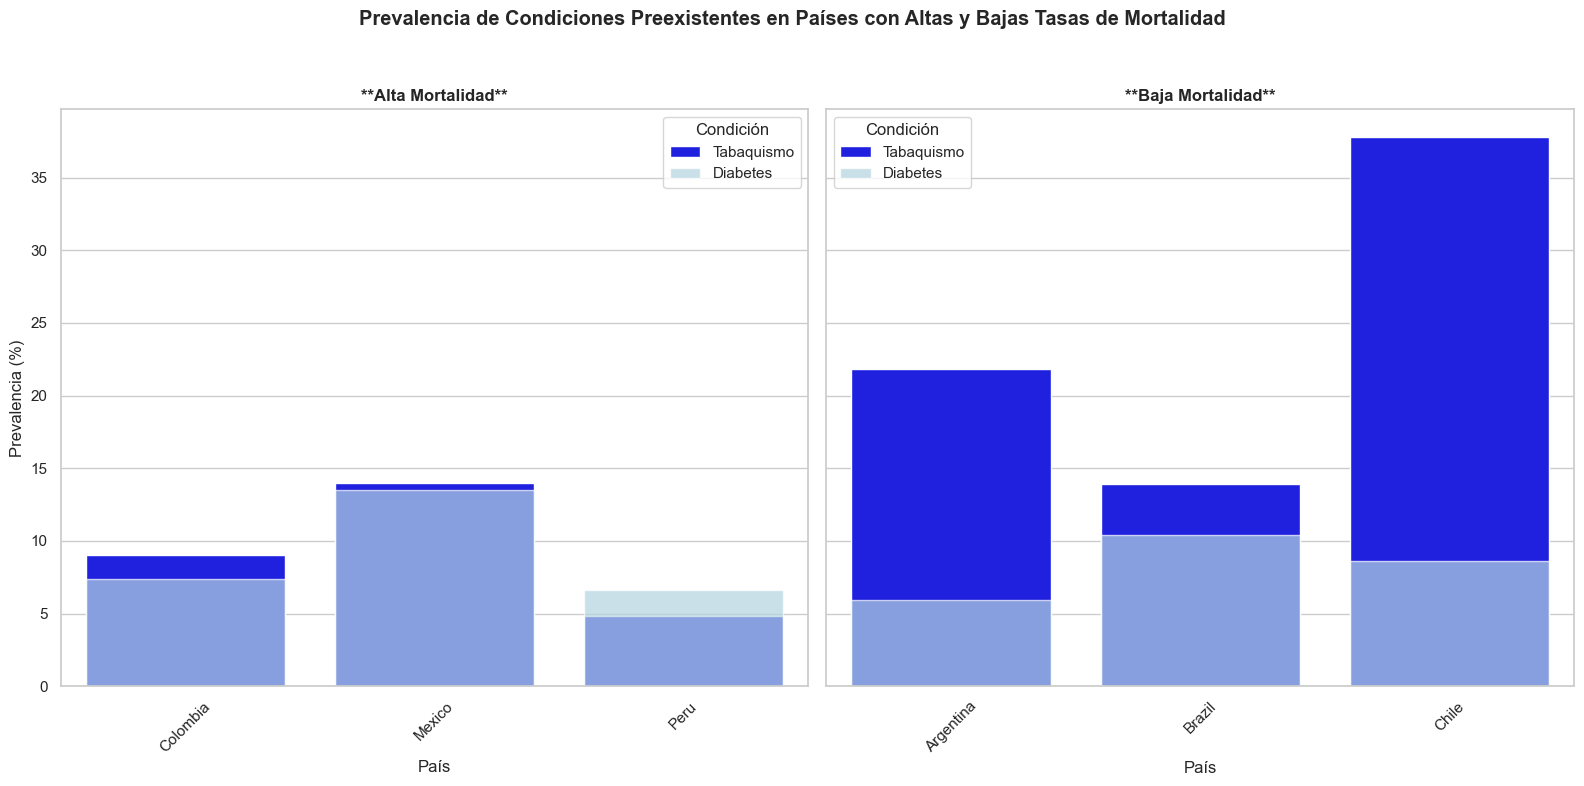

In [353]:
# Calcular la tasa de mortalidad por país
df['mortality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed'] * 100

# Obtener los últimos datos por país para evitar duplicados
country_data = df.groupby('country_name').last().reset_index()

# Separar países con alta y baja mortalidad usando la mediana
high_mortality_countries = country_data[country_data['mortality_rate'] > country_data['mortality_rate'].median()]
low_mortality_countries = country_data[country_data['mortality_rate'] <= country_data['mortality_rate'].median()]

# Condiciones preexistentes
conditions = ['smoking_prevalence', 'diabetes_prevalence']

# Crear la figura y los ejes para mostrar los países
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Gráfico para países con alta mortalidad
sns.barplot(data=high_mortality_countries, x='country_name', y='smoking_prevalence', color="blue", ax=ax[0], label="Tabaquismo")
sns.barplot(data=high_mortality_countries, x='country_name', y='diabetes_prevalence', color="lightblue", ax=ax[0], label="Diabetes", alpha=0.7)
ax[0].set_title('**Alta Mortalidad**', fontweight='bold')  # Título en negrita
ax[0].set_xlabel('País')
ax[0].set_ylabel('Prevalencia (%)')
ax[0].legend(title='Condición')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico para países con baja mortalidad
sns.barplot(data=low_mortality_countries, x='country_name', y='smoking_prevalence', color="blue", ax=ax[1], label="Tabaquismo")
sns.barplot(data=low_mortality_countries, x='country_name', y='diabetes_prevalence', color="lightblue", ax=ax[1], label="Diabetes", alpha=0.7)
ax[1].set_title('**Baja Mortalidad**', fontweight='bold')  # Título en negrita
ax[1].set_xlabel('País')
ax[1].legend(title='Condición')
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

El gráfico muestra que los países con alta mortalidad (Colombia, México y Perú) tienen una prevalencia más baja de tabaquismo y diabetes en comparación con los países con baja mortalidad (Argentina, Brasil y Chile). Sin embargo, la prevalencia de tabaquismo es significativamente mayor en los países con baja mortalidad, especialmente en Chile.

### ***Variación Mensual de Casos y Muertes***

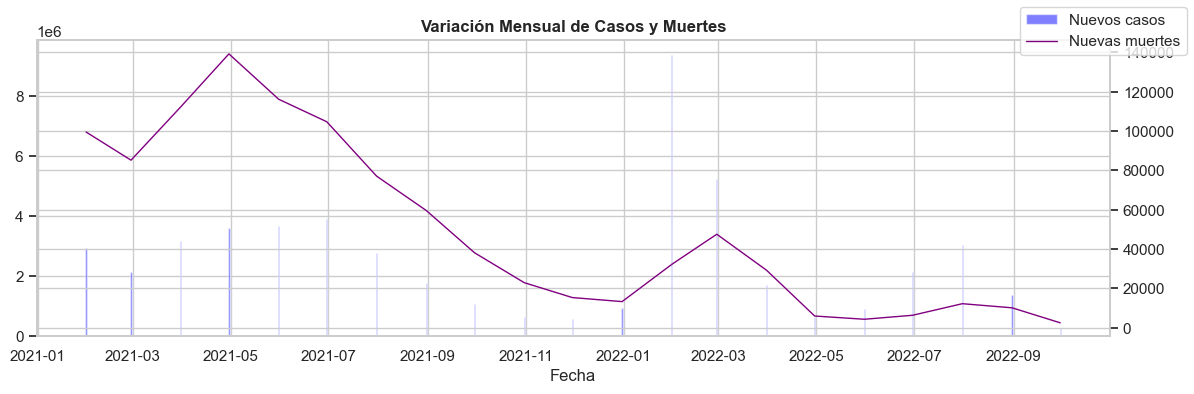

In [354]:
# Variación Mensual de Casos y Muertes (excluyendo columnas de tipo fecha en el sum)
monthly_data = df.resample('ME', on='date').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum'
}).reset_index()  # Ahora 'date' es una columna normal

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

# Gráfico de nuevos casos mensuales (barras)
ax1.bar(monthly_data['date'], monthly_data['new_confirmed'], alpha=0.5, label='Nuevos casos', color='blue')

# Gráfico de nuevas muertes mensuales (línea)
ax2.plot(monthly_data['date'], monthly_data['new_deceased'], color='purple', label='Nuevas muertes', linewidth=1)

# Configuración de etiquetas y título
ax1.set_xlabel('Fecha')
ax1.set_ylabel('')  # Eliminar etiqueta del eje y izquierdo
ax2.set_ylabel('')  # Eliminar etiqueta del eje y derecho
plt.title('Variación Mensual de Casos y Muertes', fontweight='bold')  # Título en negrita

# Leyenda y diseño ajustado
fig.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra una disminución general en el número de nuevos casos y nuevas muertes a lo largo del tiempo, con picos de casos y muertes a principios y mediados de 2021, seguidos de una tendencia descendente hasta finales de 2022.

### ***Relación entre Nuevos Casos de COVID-19, Dosis de Vacunas Administradas y Médicos por 1000 Habitantes por País***

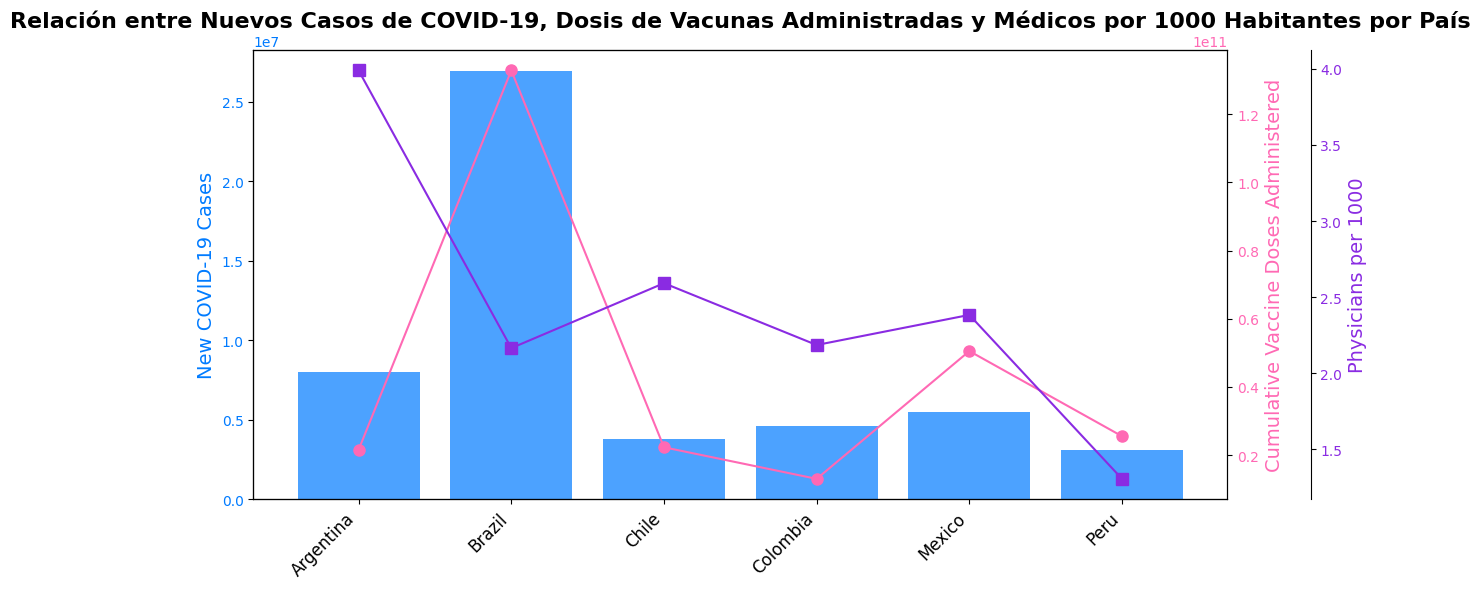

In [355]:
# Agrupar los datos por país y sumar los valores
df_grouped = df.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'cumulative_vaccine_doses_administered': 'sum',
    'physicians_per_1000': 'mean'  # Suponiendo que quieres el promedio de médicos por 1000
}).reset_index()

# Configurar el estilo del gráfico
plt.style.use('default')  # Usar el estilo por defecto, que es más limpio

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barras para los nuevos casos confirmados
color_barras = '#007BFF'  # Color azul
# ax1.set_xlabel('Country', fontsize=14)  # Eliminar o comentar esta línea
ax1.set_ylabel('New COVID-19 Cases', color=color_barras, fontsize=14)
ax1.bar(df_grouped['country_name'], df_grouped['new_confirmed'], color=color_barras, alpha=0.7, label='New COVID-19 Cases')
ax1.tick_params(axis='y', labelcolor=color_barras)

# Establecer los ticks y las etiquetas del eje x
ax1.set_xticks(range(len(df_grouped['country_name'])))  # Establecer los ticks en las posiciones correctas
ax1.set_xticklabels(df_grouped['country_name'], rotation=45, ha='right', fontsize=12)  # Rotar etiquetas del eje x

# Crear un segundo eje para las dosis de vacunas administradas
ax2 = ax1.twinx()  
color_vacunas = '#FF69B4'  # Color rosa
ax2.set_ylabel('Cumulative Vaccine Doses Administered', color=color_vacunas, fontsize=14)
ax2.plot(df_grouped['country_name'], df_grouped['cumulative_vaccine_doses_administered'], color=color_vacunas, marker='o', label='Cumulative Vaccine Doses Administered', markersize=8)
ax2.tick_params(axis='y', labelcolor=color_vacunas)

# Crear un tercer eje para la infraestructura sanitaria
ax3 = ax1.twinx()  
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje hacia la derecha
color_medicos = '#8A2BE2'  # Color violeta
ax3.set_ylabel('Physicians per 1000', color=color_medicos, fontsize=14)
ax3.plot(df_grouped['country_name'], df_grouped['physicians_per_1000'], color=color_medicos, marker='s', label='Physicians per 1000', markersize=8)
ax3.tick_params(axis='y', labelcolor=color_medicos)

# Desactivar la cuadrícula
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Títulos y leyendas
plt.title('Relación entre Nuevos Casos de COVID-19, Dosis de Vacunas Administradas y Médicos por 1000 Habitantes por País', fontsize=16, fontweight='bold', loc='center')
fig.tight_layout()  # Ajustar el layout
plt.show()

El gráfico muestra una relación entre el número de nuevos casos de COVID-19, las dosis de vacunas administradas y el número de médicos por cada 1000 habitantes en seis países de América Latina.

### ***Extra Credit: Mapa de Calor America Latina***

In [356]:
import folium
from folium.plugins import HeatMap

columns=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','cumulative_recovered']
data_map= df[columns].dropna()

#Creamos un mapa centrado en América Latina
map= folium.Map(location=[-14.235004,-51.92527], zoom_start=4)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creamos un mapa de calor para las muertes
heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered= HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

El mapa muestra una alta concentración de nuevos casos de COVID-19 en Brasil, destacando como el país con mayor incidencia en la región.

In [357]:
# Establecer la columna 'date' como índice sin eliminarla como columna

df.set_index('date', inplace=True, drop=False)

# Mostrar el DataFrame resultante

print(df)

           location_key       date country_code country_name  new_confirmed  \
date                                                                          
2021-01-01           AR 2021-01-01           AR    Argentina    2685.000000   
2021-01-02           AR 2021-01-02           AR    Argentina    7767.000000   
2021-01-03           AR 2021-01-03           AR    Argentina    4934.000000   
2021-01-04           AR 2021-01-04           AR    Argentina   13953.000000   
2021-01-05           AR 2021-01-05           AR    Argentina   14085.000000   
...                 ...        ...          ...          ...            ...   
2022-09-13           PE 2022-09-13           PE         Peru    1150.000000   
2022-09-14           PE 2022-09-14           PE         Peru      39.504501   
2022-09-15           PE 2022-09-15           PE         Peru      39.504501   
2022-09-16           PE 2022-09-16           PE         Peru      39.504501   
2022-09-17           PE 2022-09-17           PE     

In [358]:
# Guardar los datos filtrados en un archivo CSV

df.to_csv('DatosFinalesFiltrado.csv', index=False)

print("Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.")

Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.
